<a href="https://colab.research.google.com/github/HectorGtz27/FlameForeCastModel/blob/main/EMILIO4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS**



Importar las bibliotecas

In [1]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter



Lectura de los datos

In [3]:
df = pd.read_csv('DataSet23.csv', parse_dates=['Datetime'])
print(df.head())


   Unnamed: 0  brightness  confidence daynight      hora       fecha  \
0           0       322.0          68        D  21:00:00  24/02/2016   
1           1       313.8          32        D  18:00:00  30/03/2016   
2           2       325.5          67        D  17:00:00  03/04/2016   
3           3       339.3          86        D  17:00:00  03/04/2016   
4           4       301.6          43        N  09:00:00  04/04/2016   

             Datetime  fuego   latitude  longitude  
0 2016-02-24 21:00:00       1   30.8342  -110.8534  
1 2016-03-30 18:00:00       1   31.2519  -110.9623  
2 2016-03-04 17:00:00       1   31.0972  -110.8965  
3 2016-03-04 17:00:00       1   31.0988  -110.9110  
4 2016-04-04 09:00:00       1   30.7656  -110.8255  


Agrupar los registros por día

In [4]:
# Group the records by day
vPd = df.groupby([pd.Grouper(key='Datetime', freq='D')]).size().reset_index(name='count')

# Show the first few rows of the dataframe to understand its structure
vPd


,Datetime,count
0,2016-02-24,1
1,2016-02-25,0
2,2016-02-26,0
3,2016-02-27,0
4,2016-02-28,0
...,...,...
2838,2023-12-02,0
2839,2023-12-03,0
2840,2023-12-04,1
2841,2023-12-05,0


Agrupar los registros por mes

In [5]:
# Group the records by month
vPm = df.groupby([pd.Grouper(key='Datetime', freq='M')]).size().reset_index(name='count')

# Show the first few rows of the dataframe to understand its structure
vPm


,Datetime,count
0,2016-02-29,1
1,2016-03-31,3
2,2016-04-30,4
3,2016-05-31,2
4,2016-06-30,1
...,...,...
90,2023-08-31,1
91,2023-09-30,19
92,2023-10-31,2
93,2023-11-30,1


Obtener los nombres de los meses

In [6]:
# Get the names of the months from the 'Datetime' column in the vPm DataFrame
month_names = vPm["Datetime"].dt.month_name()
month_names


0      February
1         March
2         April
3           May
4          June
        ...    
90       August
91    September
92      October
93     November
94     December
Name: Datetime, Length: 95, dtype: object

Se genera un grafico con las frecuencias de registros por dia en el periodo del 2016 al 2023

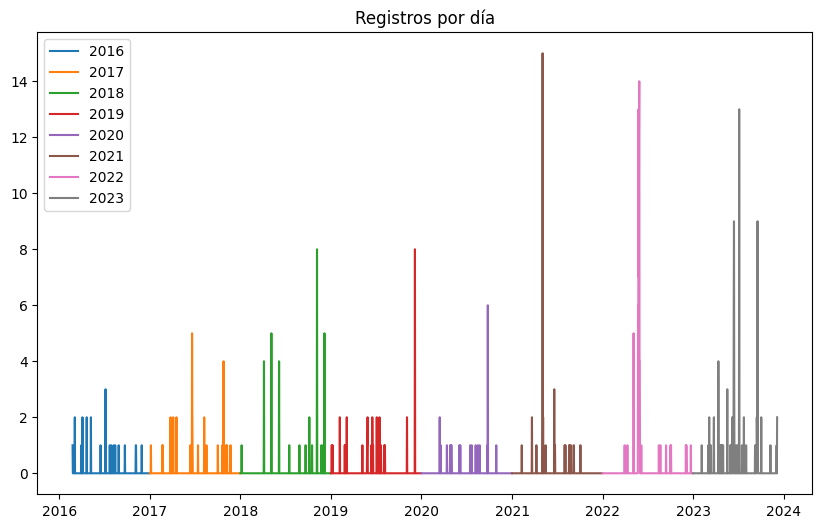

In [7]:
# Define a function to format the y-axis labels
def format_y_tick(tick_val, tick_pos):
    return f'{int(tick_val):,}'

# Plot the data
fig = plt.figure(figsize=(10, 6))
for year in vPd['Datetime'].dt.year.unique():
    data = vPd[vPd['Datetime'].dt.year == year]
    plt.plot(data['Datetime'], data['count'], label=year)

plt.title('Registros por día')
plt.ticklabel_format(axis='y', style='plain')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))
plt.legend()
plt.show()


Frecuencia de Registros por Mes

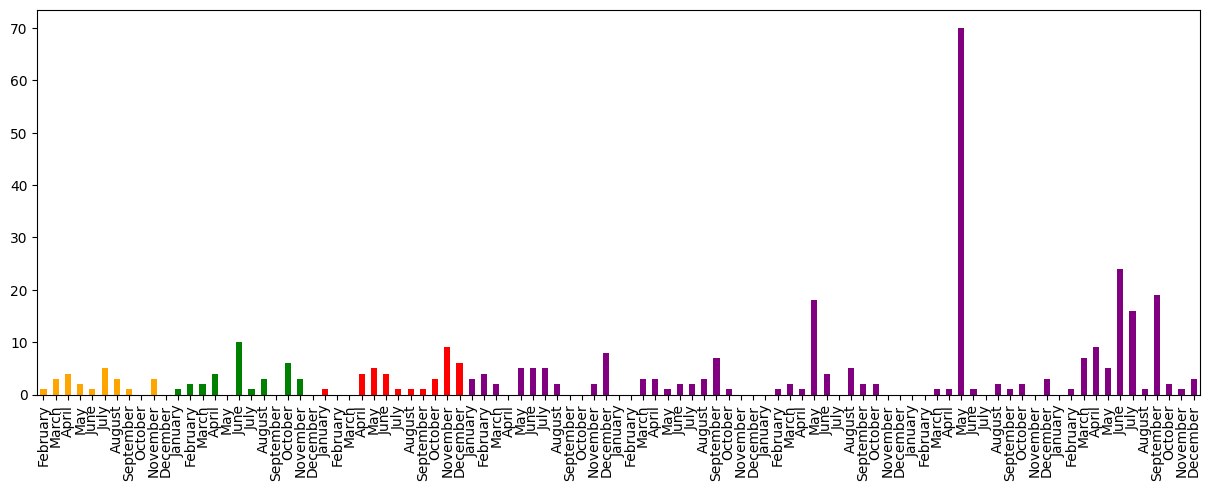

In [8]:
# Define a function to assign a color to each year
def assign_color(row):
    year = row.Datetime.year
    if year == 2015:
        return 'blue'
    elif year == 2016:
        return 'orange'
    elif year == 2017:
        return 'green'
    elif year == 2018:
        return 'red'
    else:
        return 'purple'

# Apply the function to each row of the dataframe to generate a list of colors
colors = vPm.apply(assign_color, axis=1)

# Generate the bar chart
ax = vPm["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Change the x-axis labels
ax.set_xticklabels(vPm["Datetime"].dt.month_name())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Set the y-axis tick formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Show the plot
plt.show()


Frecuencia de Registros por Mes

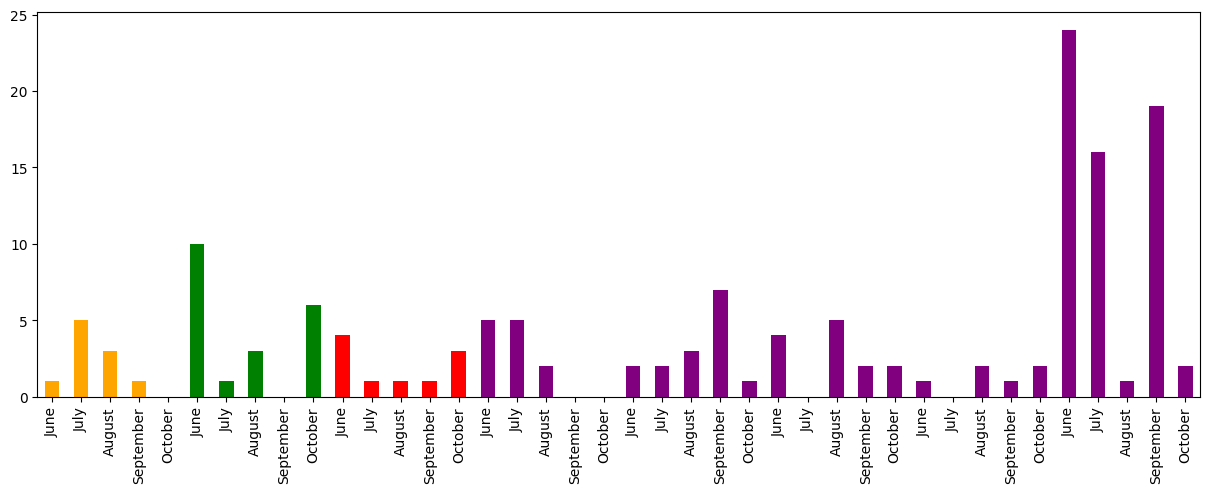

In [9]:
# Filter the data to include only the months from June to October
vPmPrincipal = vPm[(vPm["Datetime"].dt.month > 5) & (vPm["Datetime"].dt.month < 11)]

# Apply the function to each row of the dataframe to generate a list of colors
colors = vPmPrincipal.apply(assign_color, axis=1)

# Generate the bar chart
ax = vPmPrincipal["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Change the x-axis labels
ax.set_xticklabels(vPmPrincipal["Datetime"].dt.month_name())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Set the y-axis tick formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Show the plot
plt.show()


# **GENERACION DE MAPAS DE CALOR**

In [10]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('DataSet23.csv', parse_dates=['Datetime'])

# Muestra el dataframe
print(df)


     Unnamed: 0  brightness  confidence daynight      hora       fecha  \
0             0      322.00          68        D  21:00:00  24/02/2016   
1             1      313.80          32        D  18:00:00  30/03/2016   
2             2      325.50          67        D  17:00:00  03/04/2016   
3             3      339.30          86        D  17:00:00  03/04/2016   
4             4      301.60          43        N  09:00:00  04/04/2016   
..          ...         ...         ...      ...       ...         ...   
347         347      324.69          11        D  20:00:00  18/09/2023   
348         348      332.71          74        D  20:00:00  18/09/2023   
349         349      333.47          56        D  20:00:00  18/09/2023   
350         350      305.98          66        N  04:00:00  19/09/2023   
351         351      307.48          72        N  04:00:00  19/09/2023   

               Datetime  fuego   latitude  longitude  
0   2016-02-24 21:00:00       1  30.83420 -110.85340  
1

Datos minimos y maximos

In [11]:
# Calculate the minimum and maximum latitude and longitude
latMin = df["latitude"].min()
latMax = df["latitude"].max()
lonMin = df["longitude"].min()
lonMax = df["longitude"].max()

# Define the grid size in degrees
grados = 0.05

(latMin, latMax, lonMin, lonMax, grados)


(30.7387, 31.3099, -111.23656, -110.6363, 0.05)

Se calculan las dimensiones en funcion de la latitud y la longitud

In [12]:
import math

# Calculate the length of the grid in the y-axis (latitude)
yLen = math.ceil((latMax - latMin) / 0.045 + 1)

# Calculate the length of the grid in the x-axis (longitude)
xLen = math.ceil(abs((lonMin - lonMax) / 0.045 - 1))

(yLen, xLen)


(14, 15)

Se calculas las coordenadas de la cuadricula X y Y para cada putno de datos y las he almacenado en nuevas columnas en el DataFrame. Las columnas X y Y han sido convertidas a enteros.

In [13]:
# Calculate the grid coordinates for each data point and store them in new columns 'x' and 'y'
df["y"] = ((latMax - df["latitude"]) / grados)
df["x"] = ((abs(lonMin - df["longitude"])) / grados)

# Convert the 'x' and 'y' columns to integers
df = df.astype({'x': 'int', 'y': 'int'})

# Show the first few rows of the dataframe to confirm the new columns
df.head()


,Unnamed: 0,brightness,confidence,daynight,hora,fecha,Datetime,fuego,latitude,longitude,y,x
0,0,322.0,68,D,21:00:00,24/02/2016,2016-02-24 21:00:00,1,30.8342,-110.8534,9,7
1,1,313.8,32,D,18:00:00,30/03/2016,2016-03-30 18:00:00,1,31.2519,-110.9623,1,5
2,2,325.5,67,D,17:00:00,03/04/2016,2016-03-04 17:00:00,1,31.0972,-110.8965,4,6
3,3,339.3,86,D,17:00:00,03/04/2016,2016-03-04 17:00:00,1,31.0988,-110.9110,4,6
4,4,301.6,43,N,09:00:00,04/04/2016,2016-04-04 09:00:00,1,30.7656,-110.8255,10,8


DataSet

In [14]:
df

,Unnamed: 0,brightness,confidence,daynight,hora,fecha,Datetime,fuego,latitude,longitude,y,x
0,0,322.00,68,D,21:00:00,24/02/2016,2016-02-24 21:00:00,1,30.83420,-110.85340,9,7
1,1,313.80,32,D,18:00:00,30/03/2016,2016-03-30 18:00:00,1,31.25190,-110.96230,1,5
2,2,325.50,67,D,17:00:00,03/04/2016,2016-03-04 17:00:00,1,31.09720,-110.89650,4,6
3,3,339.30,86,D,17:00:00,03/04/2016,2016-03-04 17:00:00,1,31.09880,-110.91100,4,6
4,4,301.60,43,N,09:00:00,04/04/2016,2016-04-04 09:00:00,1,30.76560,-110.82550,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...
347,347,324.69,11,D,20:00:00,18/09/2023,2023-09-18 20:00:00,1,30.81045,-110.98147,9,5
348,348,332.71,74,D,20:00:00,18/09/2023,2023-09-18 20:00:00,1,30.86238,-110.95789,8,5
349,349,333.47,56,D,20:00:00,18/09/2023,2023-09-18 20:00:00,1,30.87167,-110.95984,8,5
350,350,305.98,66,N,04:00:00,19/09/2023,2023-09-19 04:00:00,1,30.87224,-110.97795,8,5


Este código agrupa los datos tanto por hora como por día. De esta manera, podemos entender cuántos registros tenemos en cada intervalo de tiempo. vPh nos da el conteo por hora, y vPd nos da el conteo por día.

In [15]:
# Group the records by hour and by day
vPh = df.groupby([pd.Grouper(key='Datetime', freq='H')]).size().reset_index(name='count')



In [16]:
vPd = df.groupby([pd.Grouper(key='Datetime', freq='D')]).size().reset_index(name='count')



In [17]:
# Show the first few rows of the dataframe grouped by hour to confirm its structure
vPh.head()

,Datetime,count
0,2016-02-24 21:00:00,1
1,2016-02-24 22:00:00,0
2,2016-02-24 23:00:00,0
3,2016-02-25 00:00:00,0
4,2016-02-25 01:00:00,0


In [18]:
vPd

,Datetime,count
0,2016-02-24,1
1,2016-02-25,0
2,2016-02-26,0
3,2016-02-27,0
4,2016-02-28,0
...,...,...
2838,2023-12-02,0
2839,2023-12-03,0
2840,2023-12-04,1
2841,2023-12-05,0


Este código muestra las primeras filas del DataFrame valoresPorHora, que contiene los datos agrupados por hora y coordenadas X y Y. Esto nos da una visión rápida de cómo se ven los datos después del agrupamiento, permitiéndonos confirmar que la estructura del DataFrame es la que esperamos.

In [19]:
# Group the records by hour, x, and y coordinates, then count the number of records for each group
valoresPorHora = df.groupby([pd.Grouper(key='Datetime', freq='H'), 'x', 'y']).size().reset_index(name='count')


In [20]:
# Show the first few rows of the dataframe to confirm its structure
valoresPorHora.head()

,Datetime,x,y,count
0,2016-02-24 21:00:00,7,9,1
1,2016-03-04 17:00:00,6,4,2
2,2016-03-30 18:00:00,5,1,1
3,2016-04-04 09:00:00,8,10,2
4,2016-04-21 17:00:00,10,8,2


Este bloque de código crea una lista de matrices, donde cada matriz representa los datos de una hora específica desde el 24 de febrero de 2016 hasta el 6 de enero de 2023. Cada matriz tiene dimensiones basadas en las longitudes X y Y calculadas previamente.

Dentro de cada matriz, la celda en la posición (y,x) muestra el número de registros en esa ubicación específica y para esa hora específica. Por ejemplo, si hay 5 incendios registrados en una ubicación específica a las 3 PM de un día determinado, entonces la matriz correspondiente a esa hora tendrá un '5' en la celda que representa esa ubicación.

Finalmente, el código muestra la primera matriz generada para verificar que todo funcionó como se esperaba.

In [21]:
from datetime import datetime, timedelta
import numpy as np

# Initialize start and end times for the loop
start_time = datetime(2016, 2, 24, 21, 0)
end_time = datetime(2023, 9, 19, 4, 0)


# Initialize an empty list to store matrices
matrices = []

# Loop through each hour between start_time and end_time
while start_time < end_time:
    # Filter the DataFrame for records corresponding to the current hour
    temp = valoresPorHora[valoresPorHora["Datetime"] == start_time]

    # Initialize a zeros matrix of dimensions (yLen, xLen)
    a = np.zeros((yLen, xLen))

    # If there are records for the current hour, populate the matrix
    if len(temp) > 0:
        for index, row in temp.iterrows():
            a[row["y"], row["x"]] = row["count"]

    # Append the matrix to the list
    matrices.append(a)

    # Increment start_time by one hour
    start_time += timedelta(hours=1)

# Show the first matrix for verification
matrices[0] if matrices else "No matrices generated"


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Este bloque de código calcula la suma total de valores contenidos en las matrices generadas durante el análisis. Cada matriz representa la actividad registrada en una hora específica dentro de un rango de fechas. El código recorre todas las matrices, suma los valores en cada una y muestra el resultado total.

In [22]:
# Initialize an empty numpy array to store the values
valores = np.array([])

# Loop through each matrix in the 'matrices' list
for i in range(len(matrices)):
    # Calculate the sum of values in the current matrix and append it to 'valores'
    valores = np.append(valores, matrices[i].sum())

# Calculate the sum of all the values in 'valores'
total_sum = valores.sum()

# Display the total sum
total_sum


344.0

Este bloque de código analiza una lista de valores y separa aquellos que son iguales a cero de los que no lo son. Los índices de los valores iguales a cero se almacenan en la lista zeroVal, mientras que los índices de los valores distintos de cero se almacenan en la lista valIndex. Esto permite identificar y gestionar los valores nulos o ceros en los datos.

In [23]:
%%time
zeroVal = []
valIndex = []

# Loop through each value in 'valores'
for i in range(len(valores)):
    if valores[i] == 0:
        zeroVal.append(i)
    else:
        valIndex.append(i)


CPU times: user 24.6 ms, sys: 0 ns, total: 24.6 ms
Wall time: 26.6 ms


En este segmento, se está calculando la longitud de dos listas:

len(zeroVal) devuelve el número de elementos en la lista zeroVal. Esta lista contiene los índices de los valores en la lista original que son iguales a cero.

len(valIndex) devuelve el número de elementos en la lista valIndex. Esta lista contiene los índices de los valores en la lista original que no son iguales a cero.

En el resultado mostrado, len(zeroVal) tiene un valor de 66116, lo que significa que hay 25443 valores en la lista original que son 203 iguales a cero. Por otro lado, len(valIndex) no se muestra en tu mensaje, pero representaría la cantidad de valores que no son cero en la lista original.

Estas operaciones ayudan a cuantificar la cantidad de ceros y valores distintos de cero en los datos analizados.

In [24]:
len(zeroVal)

66116

In [25]:
len(valIndex)

203

El resultado de t igual a 0 tiene sentido en este contexto. Significa que los datos no se encontraron secuencias de 20 valores no nulos (distintos de cero) consecutivos donde el siguiente valor sea igual al valor actual más 20. En otras palabras, no se encontraron patrones específicos en tus datos que cumplan con esta condición durante la ejecución del bucle.

Dado que t se inicializa en 0 y solo se incrementa cuando se cumple la condición mencionada, si no se cumple esa condición, t permanecerá en 0.








In [26]:
t = 0
i = 0
step = 20
hist = []

# Loop while 'i' is less than the length of 'valIndex' minus 'step'
while i < len(valIndex) - step:
    # Check if the next index is equal to the current index plus 'step'
    if valIndex[i] + step == valIndex[i + step]:
        t = t + 1
        i = i + 5
        hist.append([valIndex[i], valIndex[i + step]])
    else:
        i = i + 1

# Print the value of 't'
t


0

In [27]:
len(hist)

0

In [28]:
dataHist = []

# Loop through each item in 'hist'
for i in range(len(hist)):
    # Loop through a range of values based on 'step'
    for j in range(step):
        # Append the corresponding matrix from 'matrices' to 'dataHist'
        dataHist.append(matrices[hist[i][0] + j])


In [29]:
history=np.array(dataHist)

In [30]:
history.shape

(0,)

In [31]:
x = history.reshape((len(dataHist)//20), 20, 246, 250)

In [32]:
x.shape

(0, 20, 246, 250)

# **Generacion de Mapas Horas Mayor Frecuencia**

Se importan las librerias

In [33]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import copy
import os, datetime
from shapely.geometry.polygon import Polygon, Point
from dateutil.rrule import rrule, MONTHLY
from dateutil.parser import parse

import folium
import matplotlib.colors as colors
from branca.element import Figure

Se adapta un análisis geoespacial originalmente diseñado para un gran conjunto de datos. El objetivo es filtrar puntos geográficos dentro de un polígono definido, calcular la hora más frecuente en la que ocurren eventos en esos puntos y visualizar los resultados en mapas mensuales. El conjunto de datos tiene 352 registros y contiene columnas relevantes como 'latitude', 'longitude', y 'Datetime'.


In [34]:
# Let's start by reading the uploaded CSV file and showing its basic information to understand its structure.
import pandas as pd

# Read the CSV file
df = pd.read_csv('DataSet23.csv', parse_dates=True, infer_datetime_format=True)

# Show the basic information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  352 non-null    int64  
 1   brightness  352 non-null    float64
 2   confidence  352 non-null    int64  
 3   daynight    352 non-null    object 
 4   hora        352 non-null    object 
 5   fecha       352 non-null    object 
 6   Datetime    352 non-null    object 
 7   fuego       352 non-null    int64  
 8   latitude    352 non-null    float64
 9   longitude   352 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 27.6+ KB


Este fragmento de código utiliza NumPy para generar un conjunto de puntos geográficos. Se establecen intervalos y límites para la latitud y la longitud. Luego, se crean listas de intervalos y se generan puntos combinando estos intervalos. Al final, se imprime la cantidad de intervalos y el número total de puntos generados.


In [35]:
# Importing numpy for numerical operations
import numpy as np

# Setting the interval and boundaries for latitude and longitude
intervalo = 0.05
latMin = 30.7387
latMax = 31.3099
lonMin = -111.23656
lonMax = -110.6363

# Creating intervals for latitude and longitude
latInterval = np.arange(latMin, latMax, intervalo * 2)
lonInterval = np.arange(abs(lonMax), abs(lonMin), intervalo * 2)

# Generating points based on the latitude and longitude intervals
points = []
for i in latInterval:
    for j in lonInterval:
        points.append([-j, i])

# Print the lengths of the latitude and longitude intervals and the total number of points
len(latInterval), len(lonInterval), len(points)


(6, 7, 42)

Este fragmento de código utiliza Matplotlib para trazar un polígono y puntos de datos en un gráfico 2D. Primero, se definen las coordenadas de los vértices del polígono. Luego, se crea una 'lista cerrada' repitiendo el primer punto al final. Se extraen las coordenadas x e y para el trazado. Finalmente, se traza el polígono y se superponen los puntos de datos del conjunto de datos en el mismo gráfico, marcados en rojo.


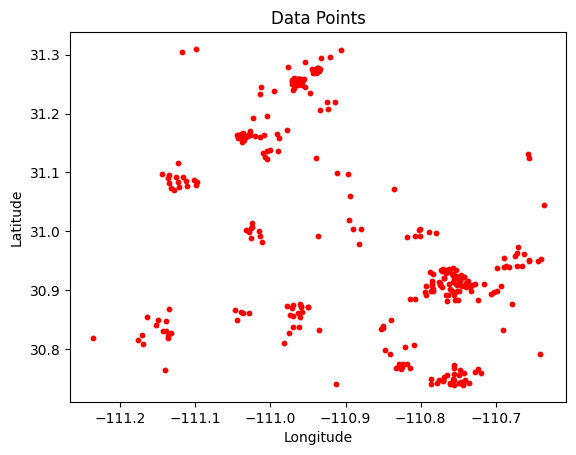

In [36]:
# Importing matplotlib for plotting
import matplotlib.pyplot as plt



# Plotting the polygon
plt.figure()
plt.scatter(df['longitude'], df['latitude'], c='red', s=10)  # plot the data points from the dataset
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Data Points')
plt.show()


Este fragmento de código extrae la fecha de inicio y de fin del conjunto de datos para determinar el rango de tiempo del análisis. Además, establece una variable de 'distancia' utilizando un 'intervalo' previamente definido. Estas variables se utilizarán para futuros análisis y filtrados en el notebook.


In [37]:
# Importing the dateutil parser to convert string to datetime object
from dateutil.parser import parse

# Parsing the 'fecha' column to get the start and end dates
fecha_inicio = parse(df["fecha"][0])
fecha_fin = parse(df["fecha"].iloc[-1])  # Using iloc for better readability

# Using the intervalo defined earlier for distancia
distancia = intervalo


Este fragmento de código realiza un análisis geotemporal. Itera a través de cada mes en un rango de fechas y, para cada mes, examina una lista de puntos geográficos. Para cada punto, el código busca eventos cercanos en el conjunto de datos y determina la hora más frecuente de esos eventos. Los resultados se almacenan en una lista de listas, donde cada sublista contiene las horas más frecuentes para todos los puntos en un mes específico.


In [38]:
%%time
from dateutil.rrule import rrule, MONTHLY
import pandas as pd
import numpy as np
from datetime import datetime

# Convert 'fecha' and 'hora' to a single datetime column
df['Datetime'] = pd.to_datetime(df['fecha'] + ' ' + df['hora'])

# Initialize an empty list to store the records
registros = []

# Loop through each month between the start and end date
for fecha in rrule(MONTHLY, dtstart=fecha_inicio, until=fecha_fin):

    # Filter the DataFrame to only include records within the current month
    dfTemp = df[(df['Datetime'] >= fecha) & (df['Datetime'] < fecha + pd.DateOffset(months=1))]
    row = []

    # Loop through each point in the list of points
    for iRow in points:

        # Find records that are close to the current point based on the 'distancia'
        cercanos = dfTemp.loc[np.sqrt((dfTemp['latitude'] - iRow[1])**2 + (dfTemp['longitude'] - iRow[0])**2) < distancia]

        # Find the most frequent hour if there are any nearby records
        if len(cercanos) != 0:
            horaMax = cercanos['Datetime'].groupby(cercanos['Datetime'].dt.hour).count().idxmax()
        else:
            horaMax = -1
        row.append(horaMax)

    registros.append(row)


CPU times: user 5.22 s, sys: 49.3 ms, total: 5.27 s
Wall time: 8.07 s


Este fragmento de código toma una copia profunda de la lista original de puntos geográficos y la almacena en una nueva lista. Luego, para cada mes y cada punto en esta nueva lista, añade la hora más frecuente de eventos cercanos. Estos datos de hora más frecuente se extraen de la lista 'registros', que se generó en un paso anterior. Al final, cada punto en la lista copiada tendrá múltiples horas más frecuentes, una para cada mes analizado.


In [39]:
%%time
import copy

# Deep copy the original points list
pointsCopy = copy.deepcopy(points)

# Loop through each month in the 'registros' list
for mes in range(len(registros)):
    y = 0
    # Loop through each point in the deep-copied list
    for i in pointsCopy:
        # Append the most frequent hour for that point in that month
        i.append(registros[mes][y])
        y += 1


CPU times: user 1.8 ms, sys: 0 ns, total: 1.8 ms
Wall time: 1.81 ms


Este fragmento de código imprime un resumen de la información clave del análisis geotemporal. Muestra el número total de coordenadas analizadas, el número de meses incluidos en el estudio, las fechas de inicio y finalización del período de análisis, y la distancia máxima en grados utilizada para el filtrado espacial.


In [40]:
print("Resumen de la información:")
print("Coordenadas: " + str(len(pointsCopy)))
print("Meses: " + str(len(registros)))

print("Fecha inicial: " + str(fecha_inicio))
print("Fecha final: " + str(fecha_fin))

print("Distancia máxima en grados: " + str(distancia))


Resumen de la información:
Coordenadas: 42
Meses: 91
Fecha inicial: 2016-02-24 00:00:00
Fecha final: 2023-09-19 00:00:00
Distancia máxima en grados: 0.05


Este fragmento de código crea un nuevo directorio para almacenar los resultados del análisis. El nombre del directorio incluye la fecha y hora actual para asegurar que sea único. Si el directorio no existe, el código lo crea automáticamente.


In [41]:
import os
import datetime

# Create a unique directory path based on the current date and time
path = './Resultados/' + datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# Create the directory if it doesn't exist
if not os.path.exists(path):
    os.makedirs(path)

path


'./Resultados/2023-10-15_10-59-07'

Este fragmento de código define dos variables importantes para el análisis. La variable 'radioMetros' establece un radio de 9000 metros que se utilizará en cálculos geográficos. La lista 'meses' contiene los nombres de los meses en español, que se usarán para etiquetar resultados en análisis temporales.


In [42]:
# Define the radius in meters for geographical calculations
radioMetros = 9000

# Define a list of month names in Spanish
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]


Este fragmento de código utiliza la biblioteca Folium para crear mapas interactivos. Para cada mes en el conjunto de datos, genera un nuevo mapa que muestra puntos de interés representados por círculos y marcadores. Los círculos se colorean según una escala de colores que representa la hora más frecuente de eventos cercanos a cada punto. El mapa para cada mes se guarda como un archivo HTML en un directorio específico.

La escala de colores representa la hora más frecuente de eventos cercanos a cada punto de interés para un mes determinado. El código utiliza una escala lineal de colores que va desde 0 a 23, correspondiendo a las 24 horas del día.

Por ejemplo, si el color de un círculo en el mapa es verde y la escala de colores indica que el verde corresponde al valor 15, eso significa que para ese punto geográfico y mes específicos, la mayoría de los eventos cercanos ocurrieron a las 15:00 horas.

La escala de colores proporciona una manera visualmente efectiva de identificar patrones temporales en los datos geográficos.


In [43]:
import folium
from branca.element import Figure
import branca.colormap as cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



# Create a colormap
colors = cm.LinearColormap([mcolors.rgb2hex(rgba) for rgba in plt.cm.Spectral(np.linspace(0, 1, 24))], vmin=0, vmax=23, max_labels=24)



# Define the points of interest as an array of coordinates
puntos_de_interes = pointsCopy

# Add the points of interest to the map
for mes in range(len(puntos_de_interes[0]) - 2):

    # Initialize a new folium map
    mapa = folium.Map(location=[27.0862, -107.41912], zoom_start=7)

    for punto in puntos_de_interes:
        if punto[mes + 2] != -1:
            # Add a circle for each point of interest
            circle = folium.Circle(
                location=[punto[1], punto[0]],
                radius=radioMetros,
                color=colors(punto[mes + 2]),
                fill=True,
                fill_color=colors(punto[mes + 2])
            )

            # Add a marker for each point of interest
            folium.Marker(
                location=[punto[1], punto[0]],
                icon=folium.DivIcon(html=f"""<div style="text-align:center; width: 10px; color: black;">{punto[mes+2]}</div>""")
            ).add_to(mapa)

            # Add the circle to the map
            circle.add_to(mapa)

    # Add the colormap to the map
    colors.caption = 'Color Scale'
    mapa.add_child(colors)

    # Save the map
    fig = Figure(width=1000, height=1200)
    fig.add_child(mapa)
    mapa.save(path + "/map_" + str(2015 + (mes // 12)) + "_" + str(meses[mes % 12]) + ".html")



Este fragmento de código crea un resumen textual de la información clave relacionada con el análisis geotemporal. El resumen incluye detalles como el número total de coordenadas analizadas, el rango de tiempo cubierto, la distancia máxima en grados utilizada para el filtrado espacial, y el radio de los círculos en los mapas. Esta información se guarda en una cadena de texto para futuras referencias o para ser escrita en un archivo.


In [44]:
r1 = "Resumen de la información:\n\n"
r2 = "Coordenadas: " + str(len(pointsCopy)) + "\n\n"
r3 = "Meses: " + str(len(registros)) + "\n\n"
r4 = "Fecha inicial: " + str(fecha_inicio) + "\n\n"
r5 = "Fecha final: " + str(fecha_fin) + "\n\n"
r6 = "Distancia máxima en grados: " + str(distancia) + "\n\n"
r7 = "Radio de cada círculo: " + str(radioMetros) + "\n\n"
text = r1 + r2 + r3 + r4 + r5 + r6 + r7

print(text)


Resumen de la información:

Coordenadas: 42

Meses: 91

Fecha inicial: 2016-02-24 00:00:00

Fecha final: 2023-09-19 00:00:00

Distancia máxima en grados: 0.05

Radio de cada círculo: 9000




# **PROCESAMIETO DE DATOS**

Importar librerias

In [45]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# Lee el archivo CSV
df = pd.read_csv('DataSet23.csv', index_col=0, parse_dates=["Datetime"])

# Muestra el dataframe
df

CPU times: user 34.8 ms, sys: 1.04 ms, total: 35.9 ms
Wall time: 37 ms


,brightness,confidence,daynight,hora,fecha,Datetime,fuego,latitude,longitude
0,322.00,68,D,21:00:00,24/02/2016,2016-02-24 21:00:00,1,30.83420,-110.85340
1,313.80,32,D,18:00:00,30/03/2016,2016-03-30 18:00:00,1,31.25190,-110.96230
2,325.50,67,D,17:00:00,03/04/2016,2016-03-04 17:00:00,1,31.09720,-110.89650
3,339.30,86,D,17:00:00,03/04/2016,2016-03-04 17:00:00,1,31.09880,-110.91100
4,301.60,43,N,09:00:00,04/04/2016,2016-04-04 09:00:00,1,30.76560,-110.82550
...,...,...,...,...,...,...,...,...,...
347,324.69,11,D,20:00:00,18/09/2023,2023-09-18 20:00:00,1,30.81045,-110.98147
348,332.71,74,D,20:00:00,18/09/2023,2023-09-18 20:00:00,1,30.86238,-110.95789
349,333.47,56,D,20:00:00,18/09/2023,2023-09-18 20:00:00,1,30.87167,-110.95984
350,305.98,66,N,04:00:00,19/09/2023,2023-09-19 04:00:00,1,30.87224,-110.97795


**Se establece el area de estudio y la resolucion espacial**

Se utiliza la latitud y longitud para determinar el area de analisis

La resolucion espacial determina el tamaño que tendra cada lado del pixel, en este caso el area de estudio se dividira en zonas de  0.009071666666666664x0.010004333333333193.

Con la resolucion espacial se podra calcular la cantidad de zonas que tiene el area total, por lo que en este ejemplo resultaria de 64x64.

Por esta razon las matrices para generar las imagenes deberan de ser de 64x64




In [46]:
import math

# Límites de latitud y longitud
latF = 31.3099
latI = 30.7387
lonF = -110.6363
lonI = -111.23656


# Calcula la resolución espacial necesaria para obtener una cuadrícula de 60x60
resEspLat = (latF - latI) / 64
resEspLon = (lonF - lonI) / 64

print("\nNueva resolución espacial para latitud:", resEspLat)
print("Nueva resolución espacial para longitud:", resEspLon)

# Establecer el número de columnas y renglones directamente a 60
cuaPcolumna = 64
cuaPrenglon = 64

print("\nDimensiones de las matrices:")
print("Número de columnas:", cuaPcolumna)
print("Número de renglones:", cuaPrenglon)



Nueva resolución espacial para latitud: 0.00892499999999996
Nueva resolución espacial para longitud: 0.009379062499999868

Dimensiones de las matrices:
Número de columnas: 64
Número de renglones: 64


Filtrado de datos

El código filtra el DataFrame df para mantener solo las filas que cumplan con ciertos rangos de latitud y longitud. Utiliza el índice del DataFrame para el rango de latitud y la columna longitude para el rango de longitud. El DataFrame resultante df contiene solo las filas que satisfacen ambas condiciones.

**Intervalo de fechas**

En este caso se utiliza el primer y ultimo registro como fecha inicial y fecha final, en este caso como se generara una imagen por dia, solo se tomara en cuenta la fecha sin considerar la hora.


In [47]:
# Fecha inicial y final
fI = df['Datetime'].iloc[0].replace(hour=0, minute=0, second=0)
fF = df['Datetime'].iloc[-1].replace(hour=0, minute=0, second=0)


**Generando las matrices**

En esta parte se hace un ciclo entre la fecha inicial y la fecha final revisando los datos que se obtienen cada dia, con los datos de cada dia se registra la actividad de ese dia en la matriz.

Al final se obtendra una lista con matrices que representa la cantidad de dias que contienen estos datos.


In [48]:
%%time
from datetime import timedelta
import numpy as np

matrices = []
fecha = fI
fechaFinal = fF + timedelta(days=1)

while fecha < fechaFinal:
    print(f"Procesando fecha: {fecha}")
    a = df[(df['Datetime'] >= fecha) & (df['Datetime'] < (fecha + timedelta(days=1)))]
    m = np.zeros((cuaPcolumna, cuaPrenglon))

    for index, item in a.iterrows():
        latitud = item['latitude']  # Utilizando la columna 'latitude'
        longitud = item['longitude']  # Utilizando la columna 'longitude'

        y = int((latitud - latI) / resEspLat)
        x = int((longitud - lonI) / resEspLon)

        if 0 <= y < cuaPcolumna and 0 <= x < cuaPrenglon:  # Verificar los límites
            m[y, x] = 1
        else:
            print(f"Omitiendo: índice fuera de límites para y: {y}, x: {x}")

    fecha = fecha + timedelta(days=1)
    matrices.append(m)


Procesando fecha: 2016-02-24 00:00:00
Procesando fecha: 2016-02-25 00:00:00
Procesando fecha: 2016-02-26 00:00:00
Procesando fecha: 2016-02-27 00:00:00
Procesando fecha: 2016-02-28 00:00:00
Procesando fecha: 2016-02-29 00:00:00
Procesando fecha: 2016-03-01 00:00:00
Procesando fecha: 2016-03-02 00:00:00
Procesando fecha: 2016-03-03 00:00:00
Procesando fecha: 2016-03-04 00:00:00
Procesando fecha: 2016-03-05 00:00:00
Procesando fecha: 2016-03-06 00:00:00
Procesando fecha: 2016-03-07 00:00:00
Procesando fecha: 2016-03-08 00:00:00
Procesando fecha: 2016-03-09 00:00:00
Procesando fecha: 2016-03-10 00:00:00
Procesando fecha: 2016-03-11 00:00:00
Procesando fecha: 2016-03-12 00:00:00
Procesando fecha: 2016-03-13 00:00:00
Procesando fecha: 2016-03-14 00:00:00
Procesando fecha: 2016-03-15 00:00:00
Procesando fecha: 2016-03-16 00:00:00
Procesando fecha: 2016-03-17 00:00:00
Procesando fecha: 2016-03-18 00:00:00
Procesando fecha: 2016-03-19 00:00:00
Procesando fecha: 2016-03-20 00:00:00
Procesando f

In [49]:
len(matrices)

2765

**Visualizacion**

Se pueden visualizar 2765 imagenes, pero nomas se van a mostar 100.La matriz representa un día específico. Todos los eventos que ocurren en ese día se marcan en la matriz en función de sus coordenadas de latitud y longitud. No se distingue entre diferentes horas del mismo día en este enfoque; todos los eventos del día se agrupan en una sola matriz.

Matriz 1, valores: 0.0


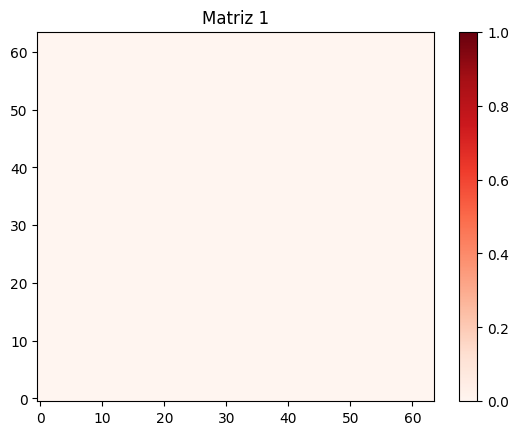

Matriz 2, valores: 1.0


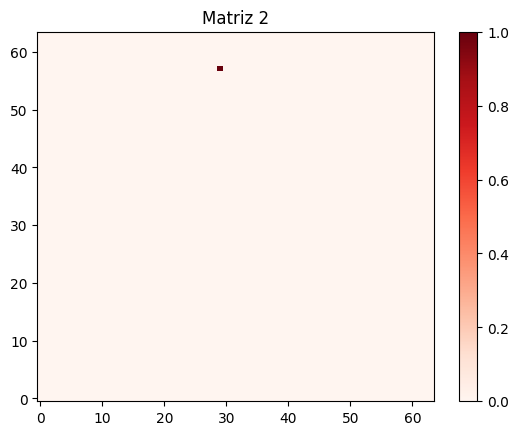

Matriz 3, valores: 2.0


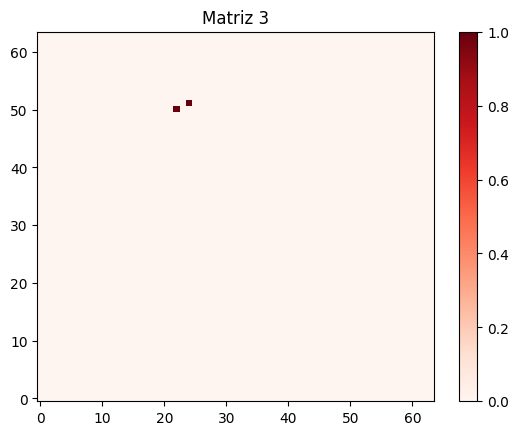

Matriz 4, valores: 0.0


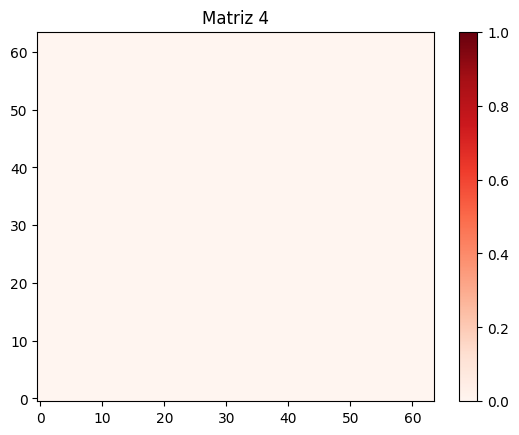

Matriz 5, valores: 0.0


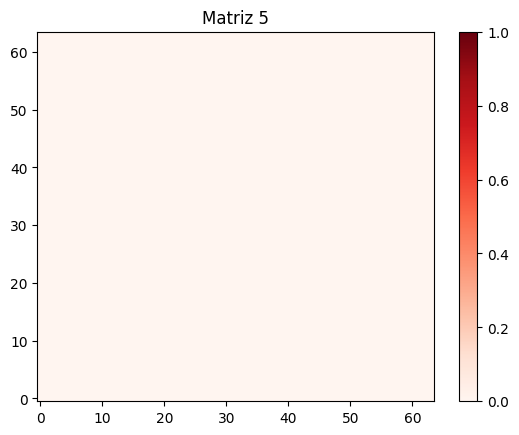

Matriz 6, valores: 0.0


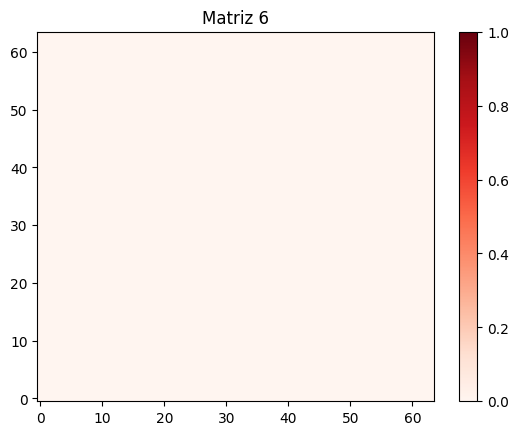

Matriz 7, valores: 0.0


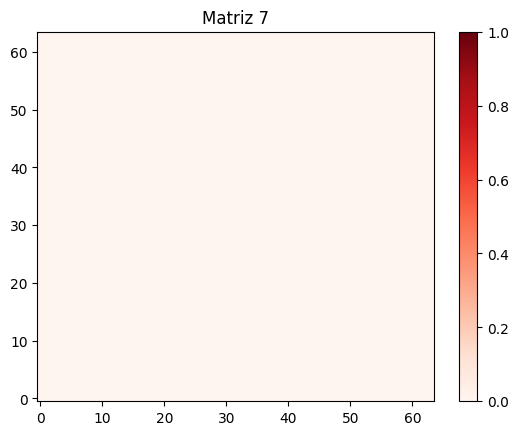

Matriz 8, valores: 0.0


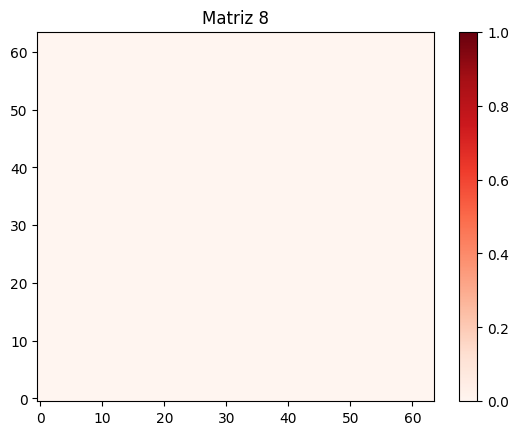

Matriz 9, valores: 0.0


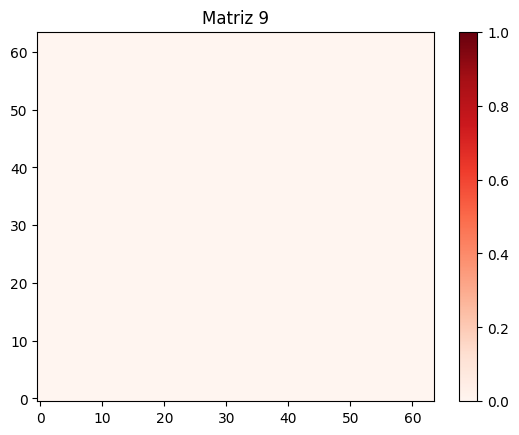

Matriz 10, valores: 0.0


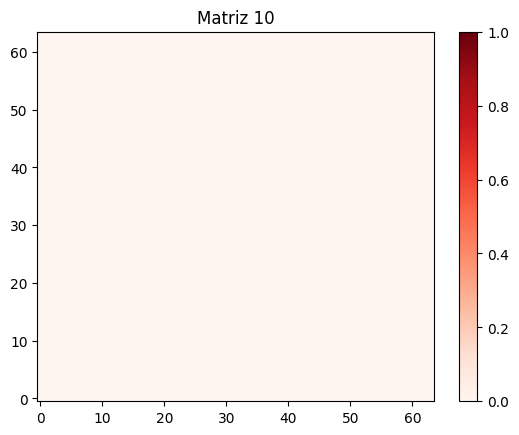

Matriz 11, valores: 0.0


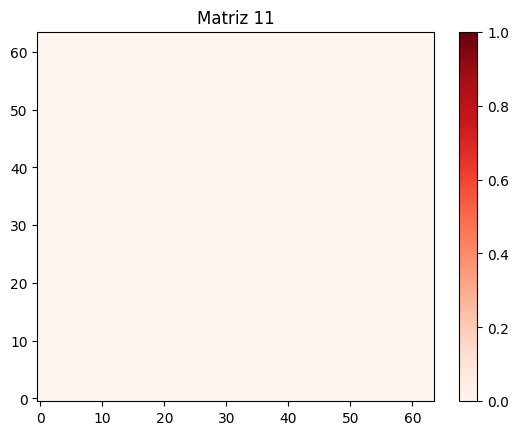

Matriz 12, valores: 0.0


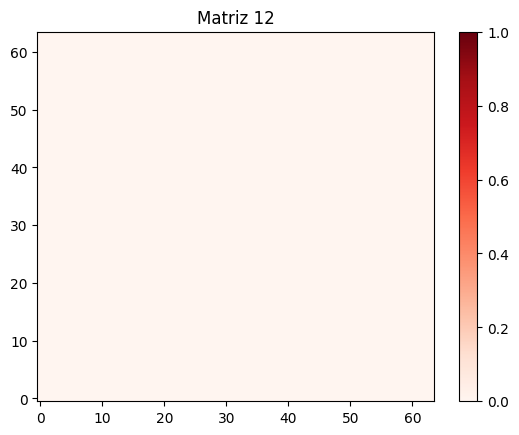

Matriz 13, valores: 0.0


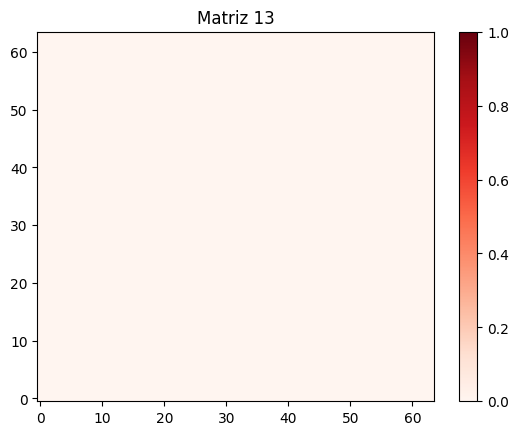

Matriz 14, valores: 0.0


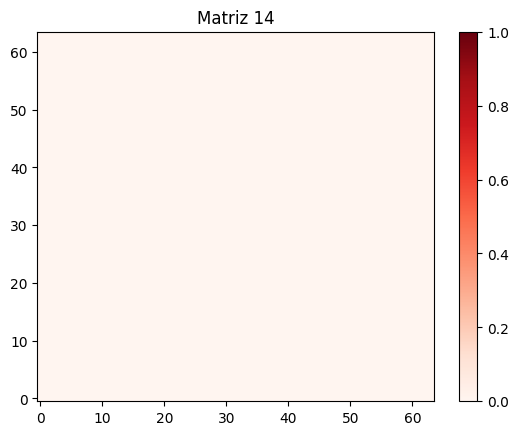

Matriz 15, valores: 0.0


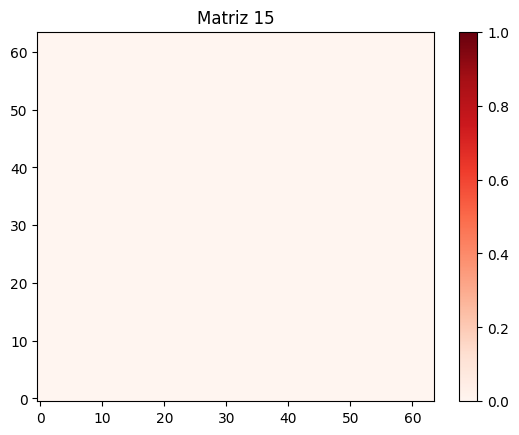

Matriz 16, valores: 0.0


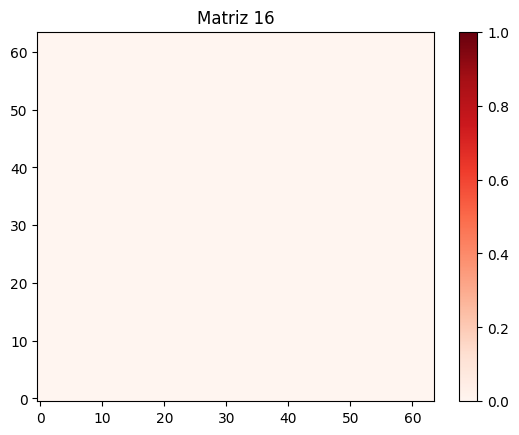

Matriz 17, valores: 0.0


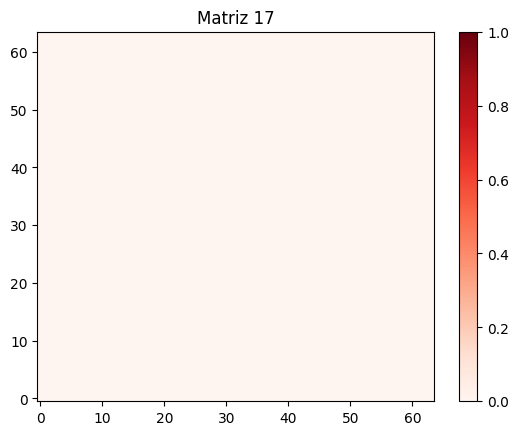

Matriz 18, valores: 0.0


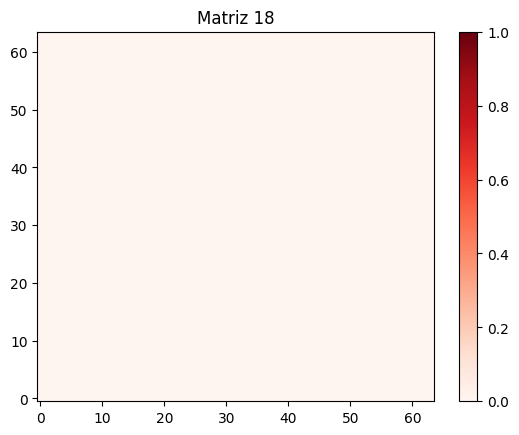

Matriz 19, valores: 0.0


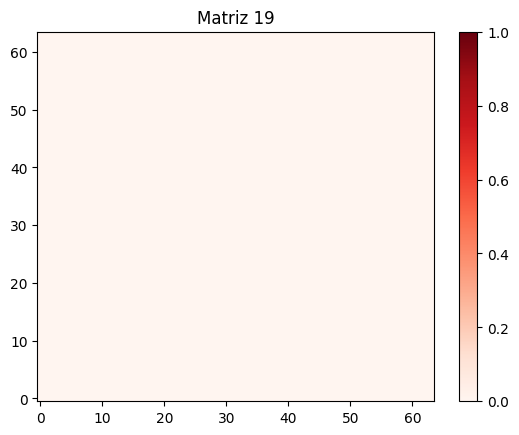

Matriz 20, valores: 0.0


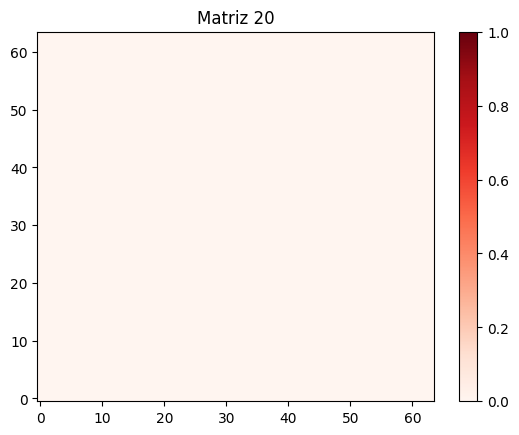

Matriz 21, valores: 3.0


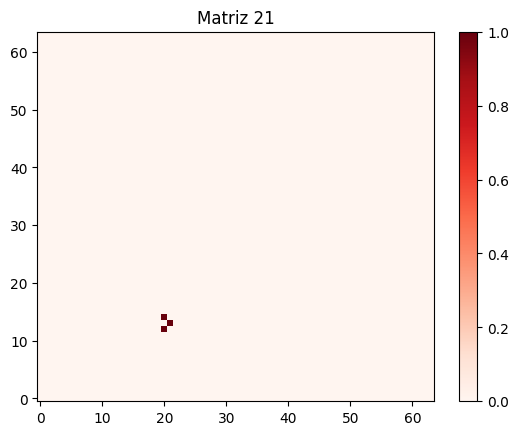

Matriz 22, valores: 1.0


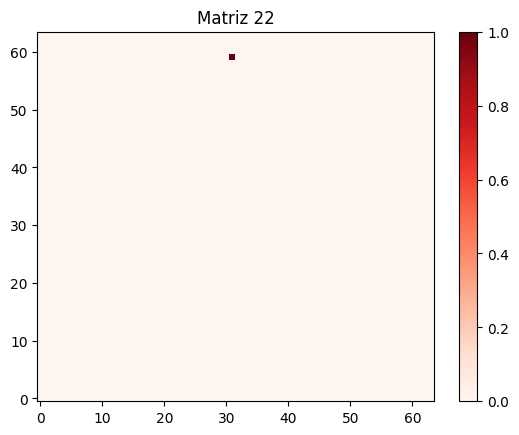

Matriz 23, valores: 0.0


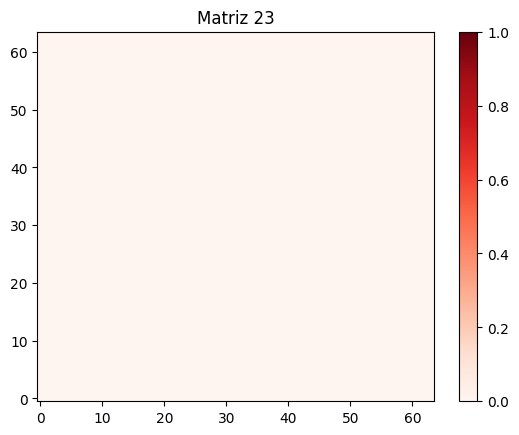

Matriz 24, valores: 0.0


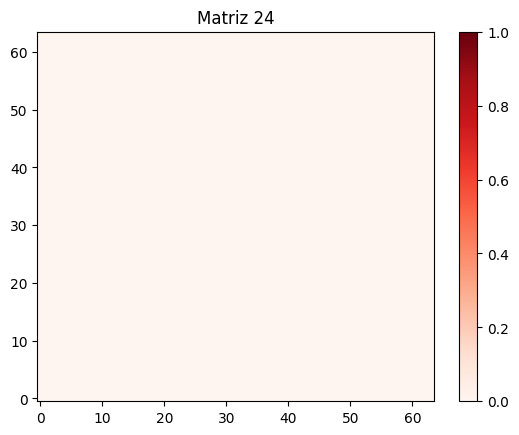

Matriz 25, valores: 0.0


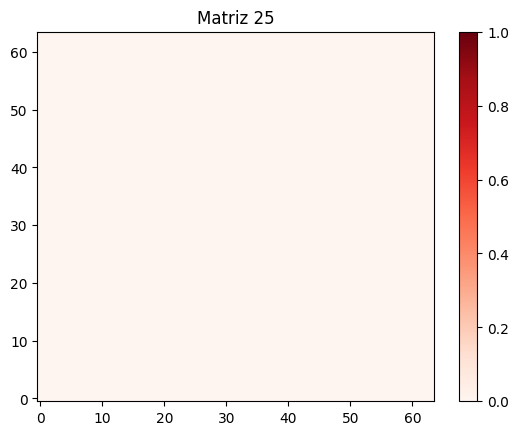

Matriz 26, valores: 1.0


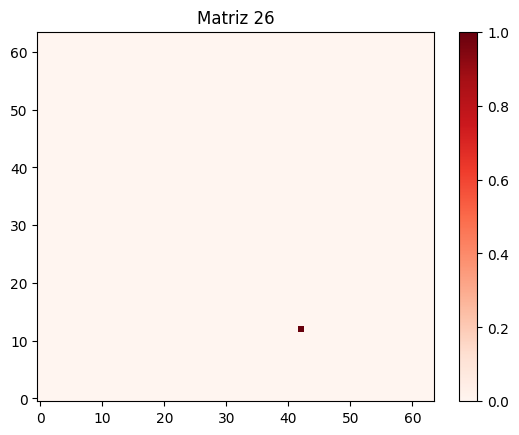

Matriz 27, valores: 0.0


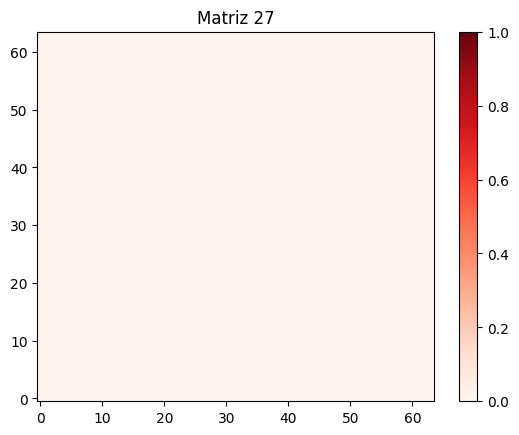

Matriz 28, valores: 1.0


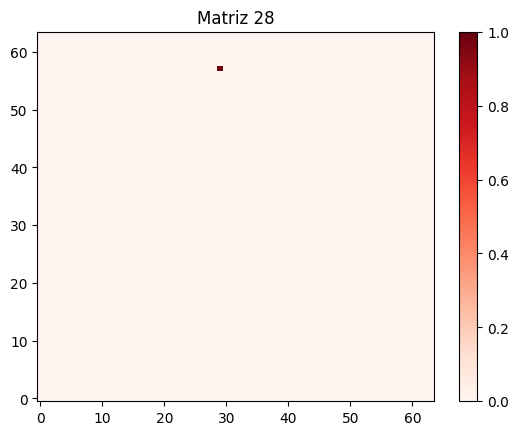

Matriz 29, valores: 0.0


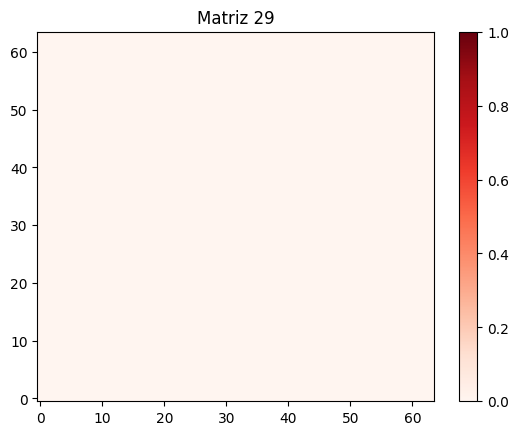

Matriz 30, valores: 0.0


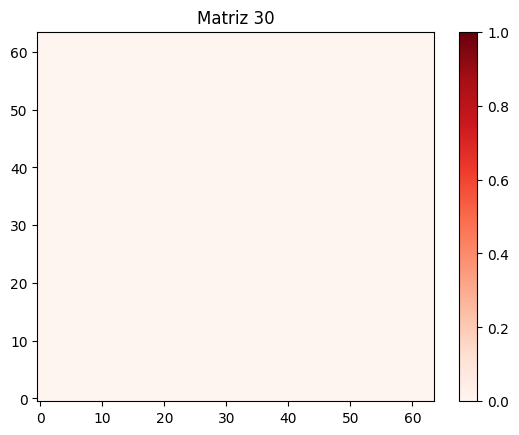

Matriz 31, valores: 0.0


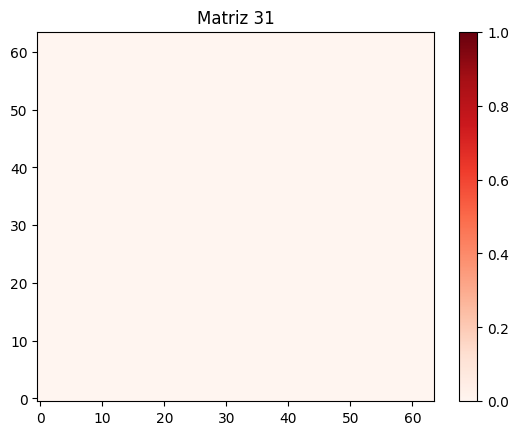

Matriz 32, valores: 0.0


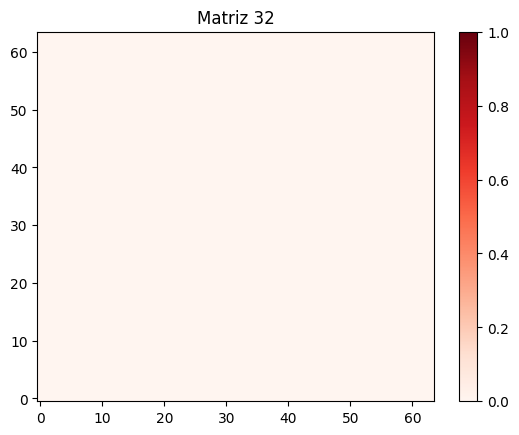

Matriz 33, valores: 1.0


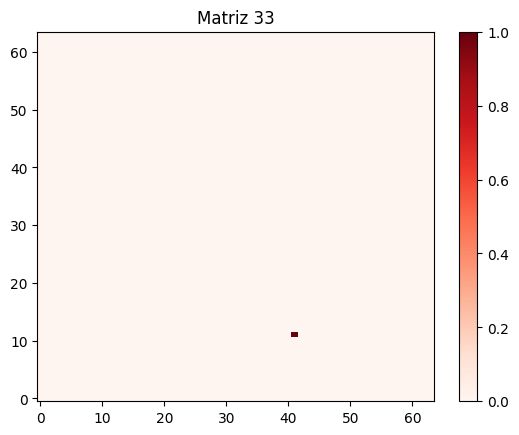

Matriz 34, valores: 0.0


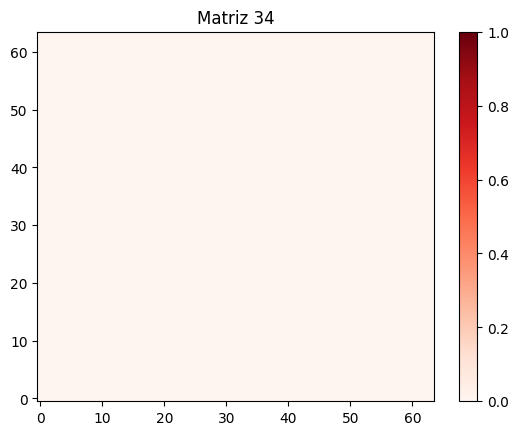

Matriz 35, valores: 0.0


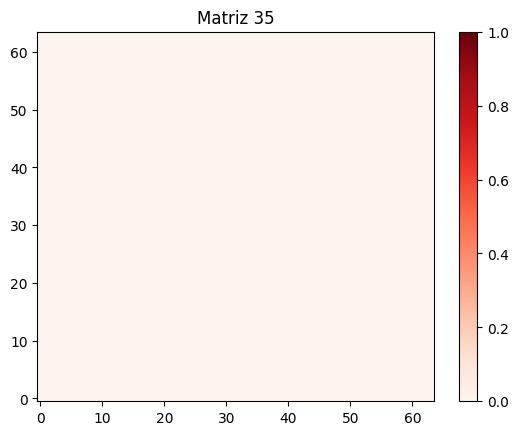

Matriz 36, valores: 1.0


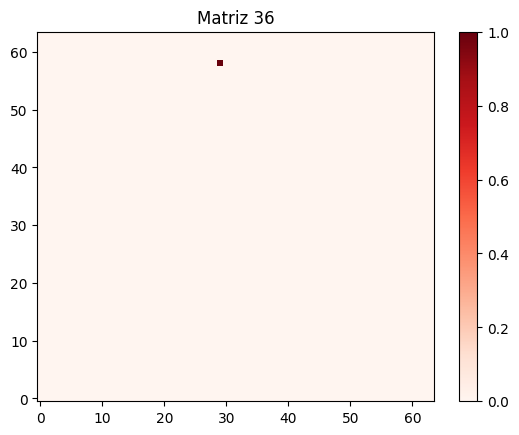

Matriz 37, valores: 0.0


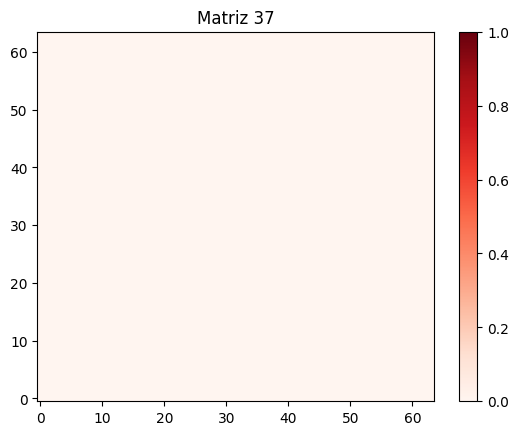

Matriz 38, valores: 0.0


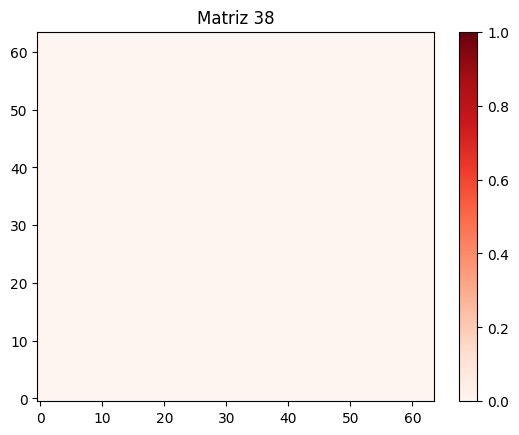

Matriz 39, valores: 0.0


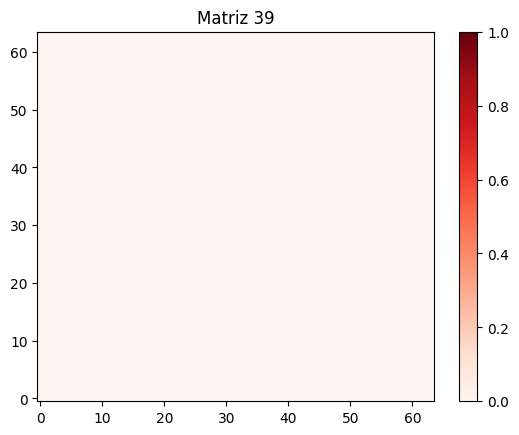

Matriz 40, valores: 1.0


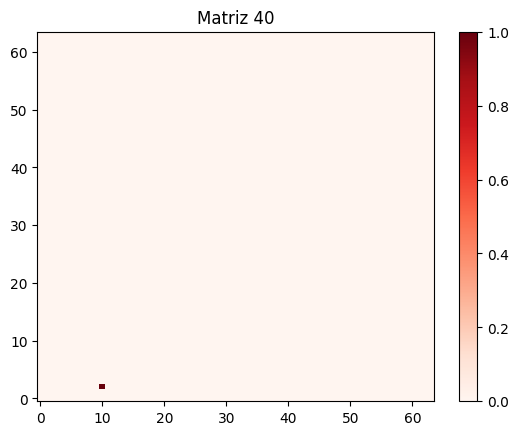

Matriz 41, valores: 0.0


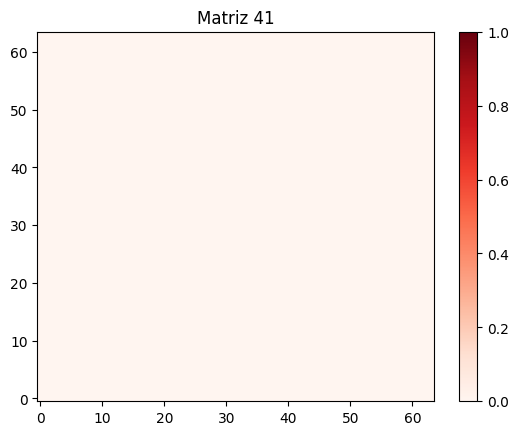

Matriz 42, valores: 0.0


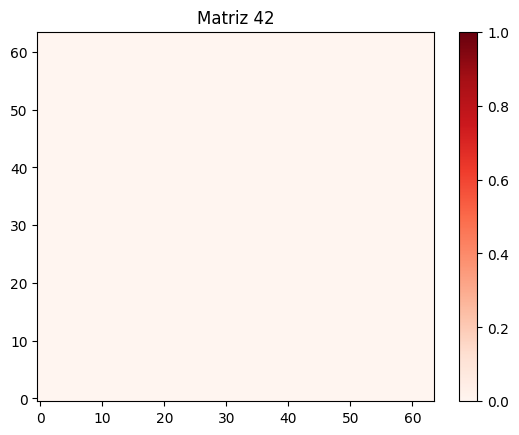

Matriz 43, valores: 0.0


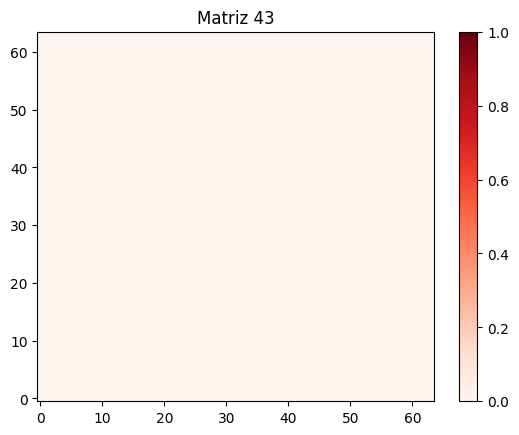

Matriz 44, valores: 0.0


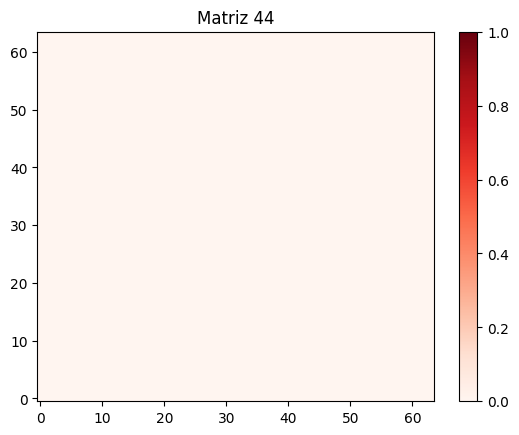

Matriz 45, valores: 0.0


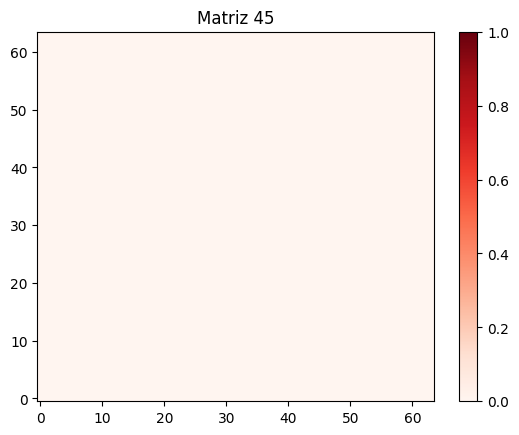

Matriz 46, valores: 0.0


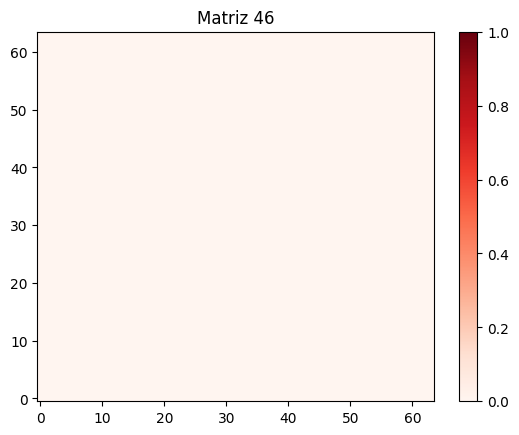

Matriz 47, valores: 0.0


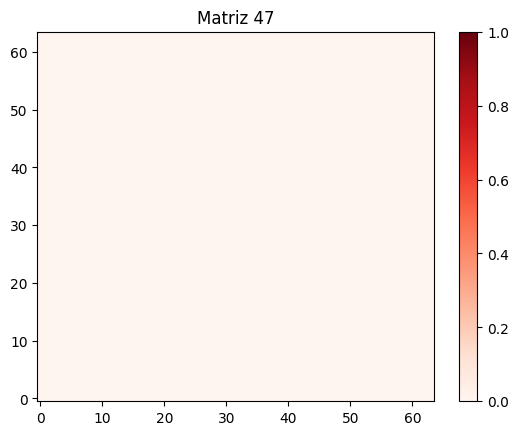

Matriz 48, valores: 0.0


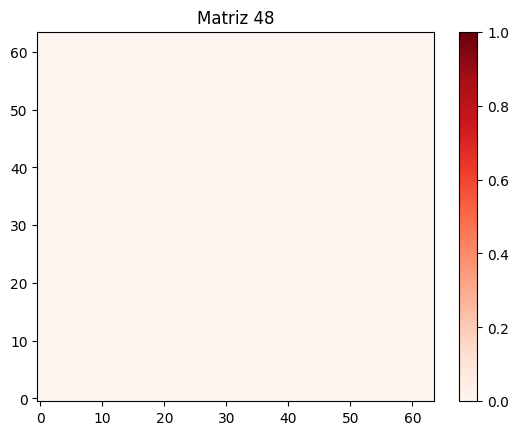

Matriz 49, valores: 0.0


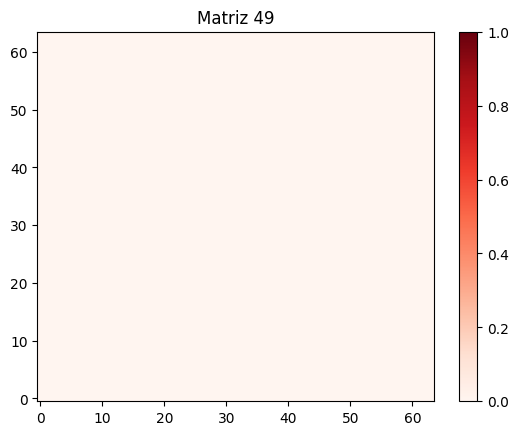

Matriz 50, valores: 0.0


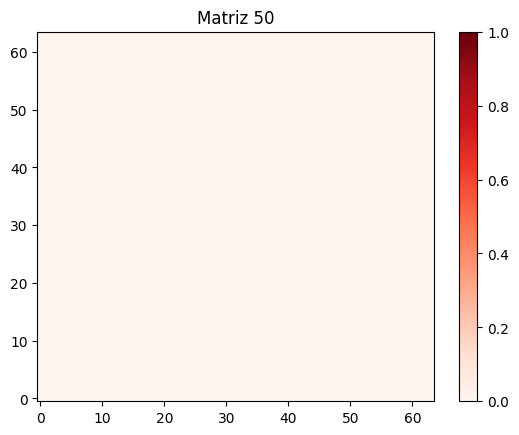

Matriz 51, valores: 0.0


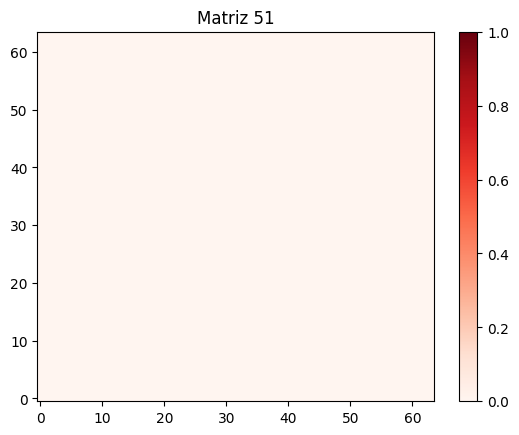

Matriz 52, valores: 0.0


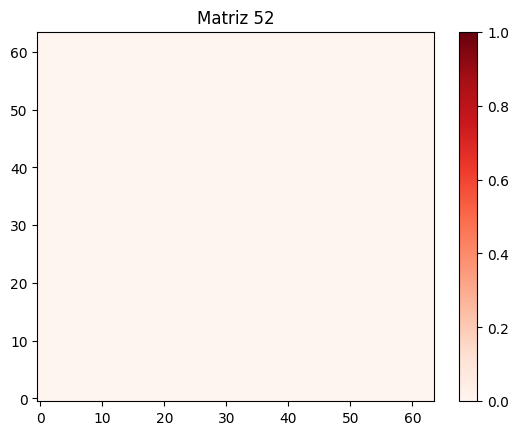

Matriz 53, valores: 0.0


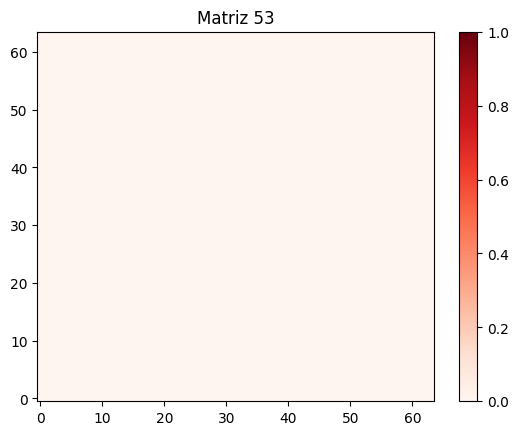

Matriz 54, valores: 0.0


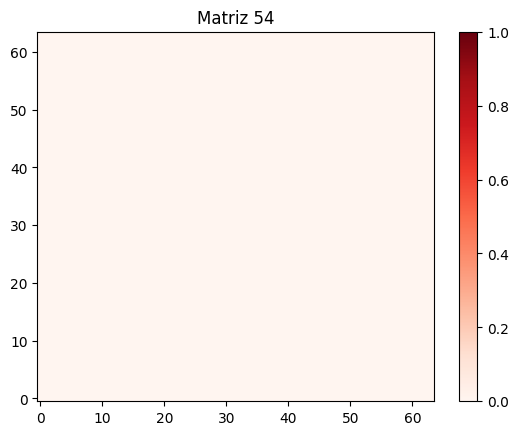

Matriz 55, valores: 0.0


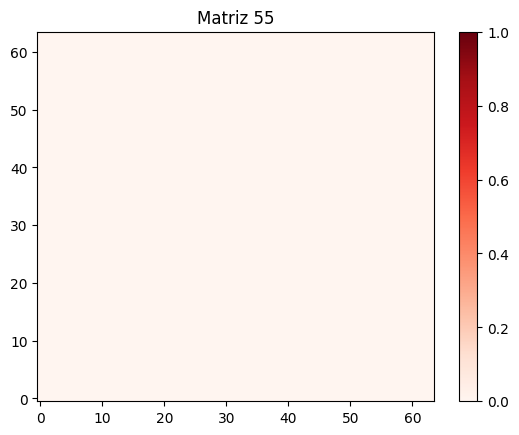

Matriz 56, valores: 0.0


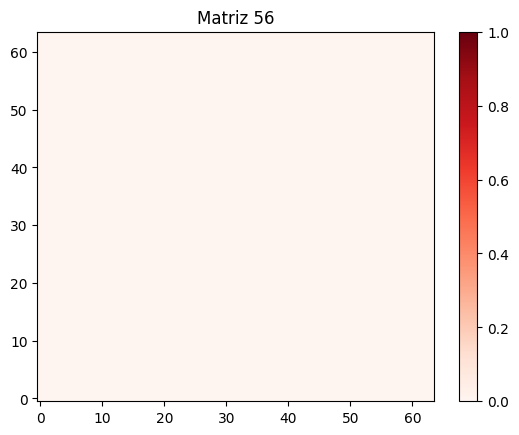

Matriz 57, valores: 3.0


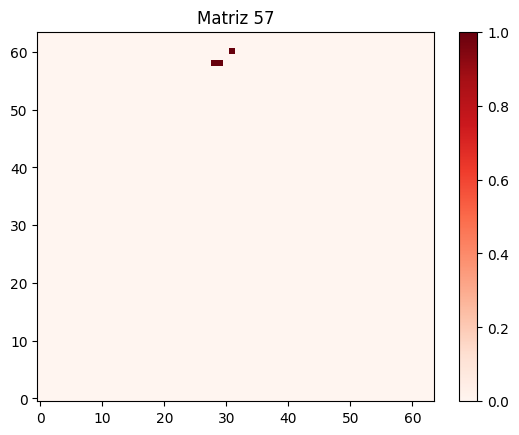

Matriz 58, valores: 0.0


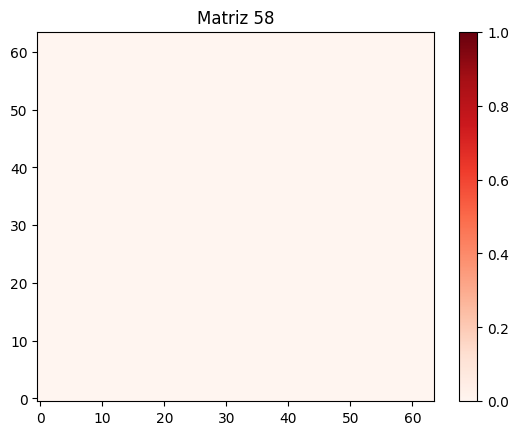

Matriz 59, valores: 0.0


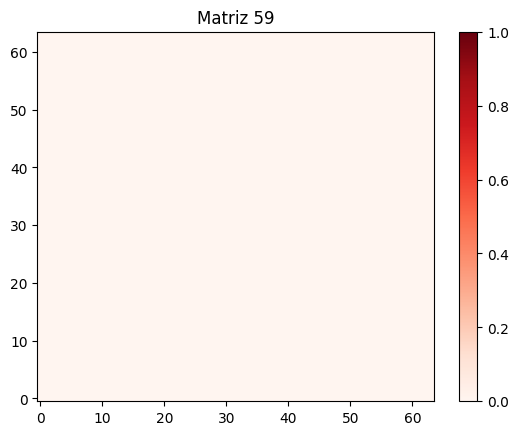

Matriz 60, valores: 0.0


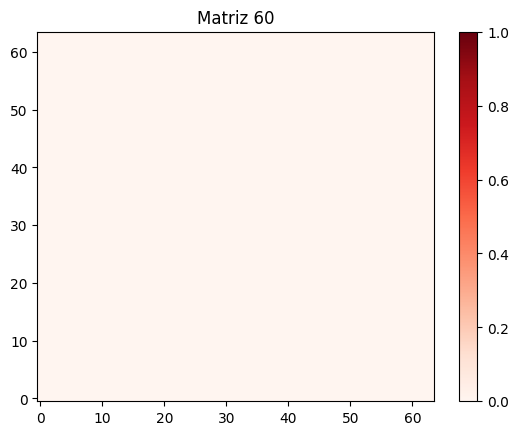

Matriz 61, valores: 0.0


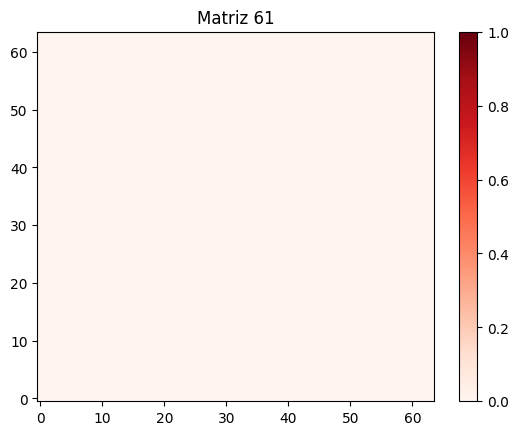

Matriz 62, valores: 0.0


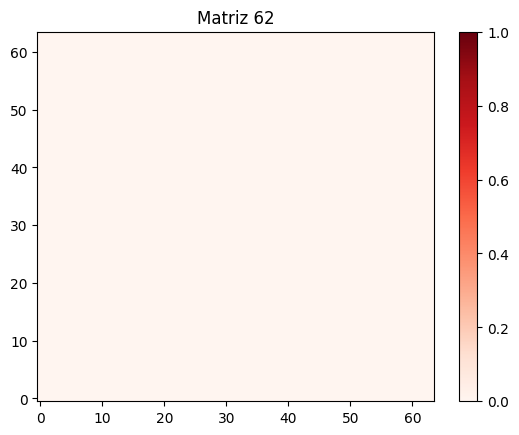

Matriz 63, valores: 0.0


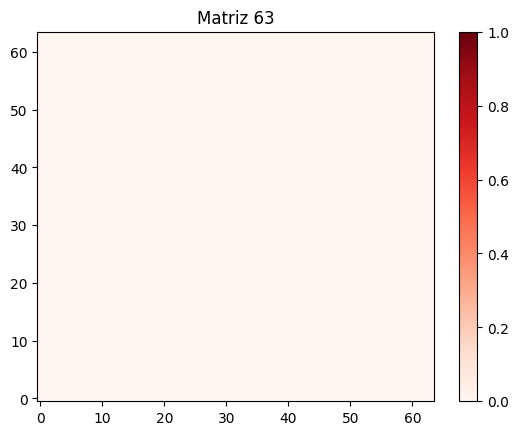

Matriz 64, valores: 0.0


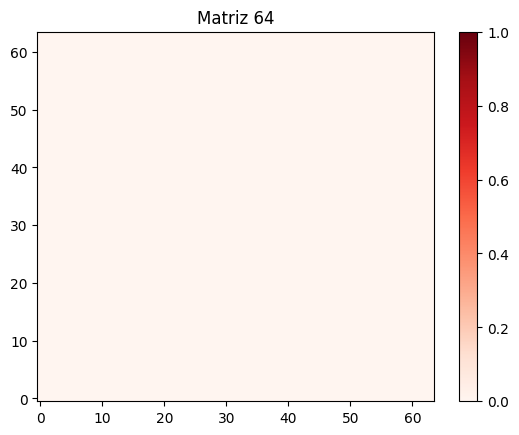

Matriz 65, valores: 0.0


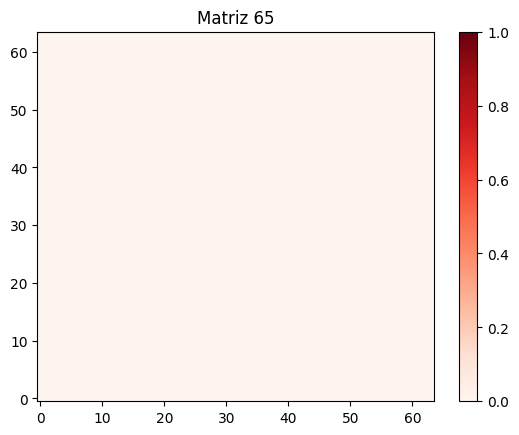

Matriz 66, valores: 0.0


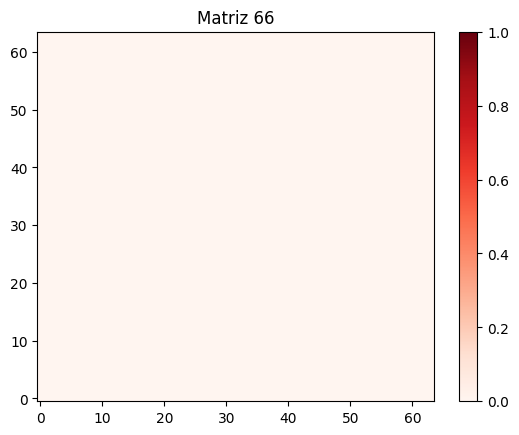

Matriz 67, valores: 0.0


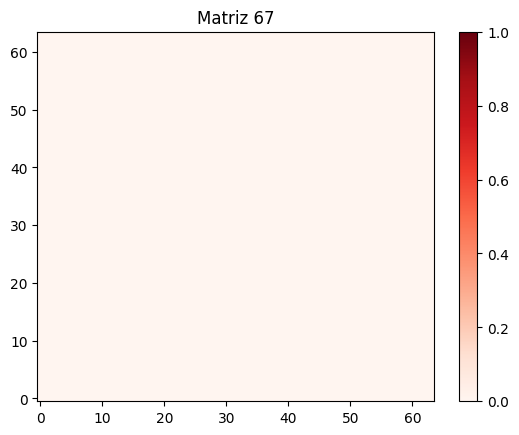

Matriz 68, valores: 0.0


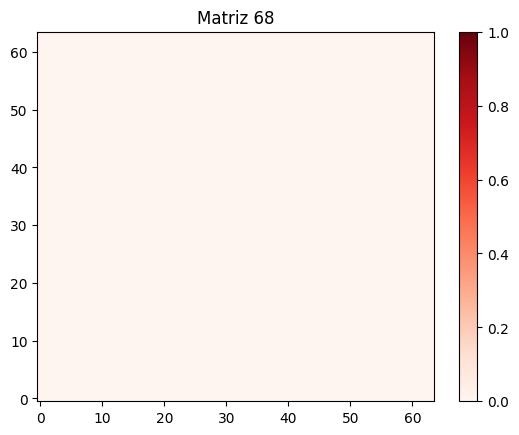

Matriz 69, valores: 1.0


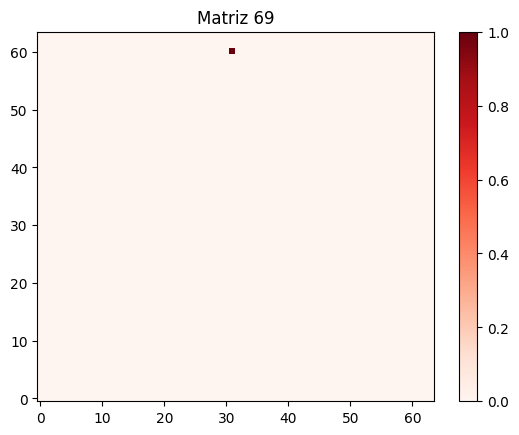

Matriz 70, valores: 0.0


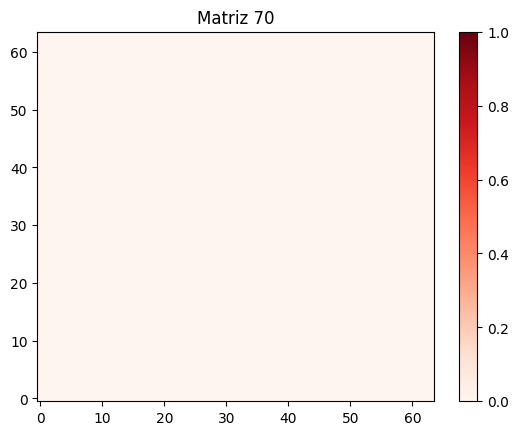

Matriz 71, valores: 0.0


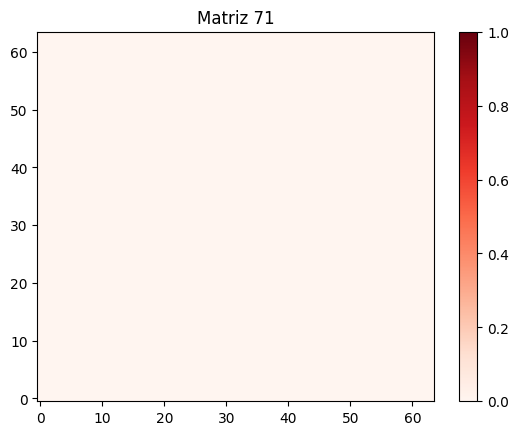

Matriz 72, valores: 0.0


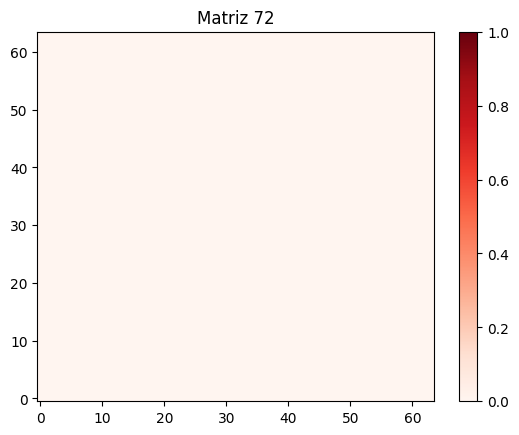

Matriz 73, valores: 1.0


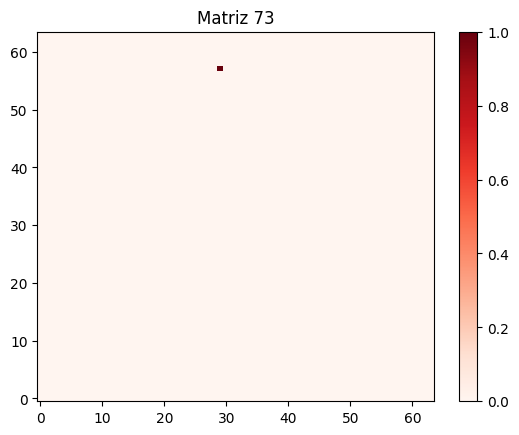

Matriz 74, valores: 0.0


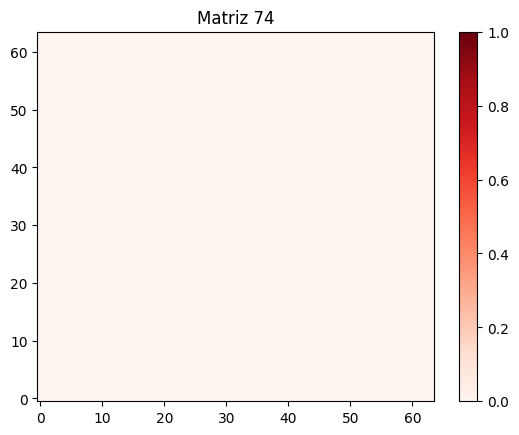

Matriz 75, valores: 0.0


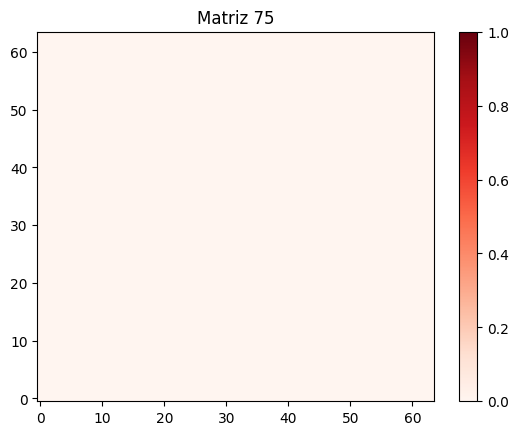

Matriz 76, valores: 1.0


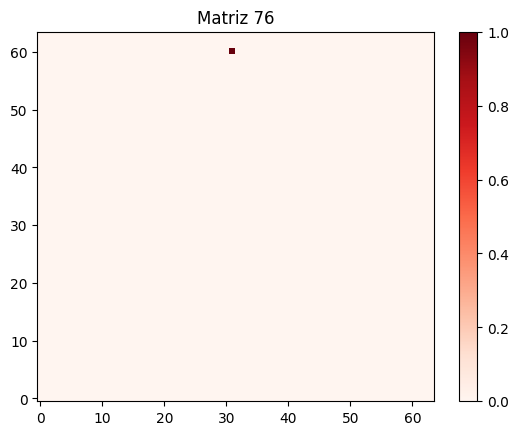

Matriz 77, valores: 2.0


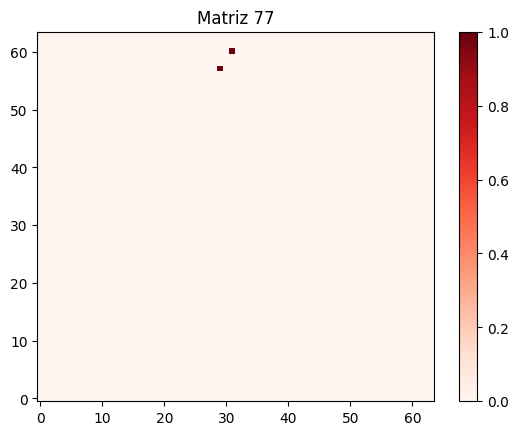

Matriz 78, valores: 0.0


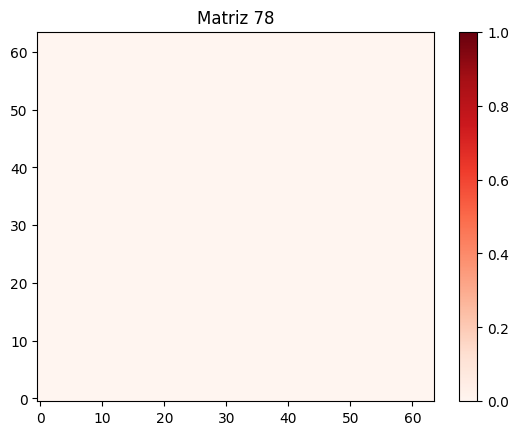

Matriz 79, valores: 0.0


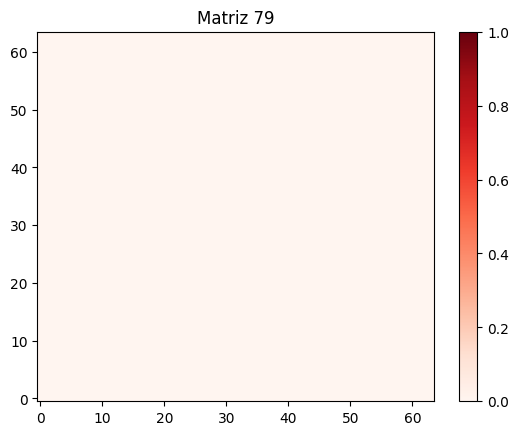

Matriz 80, valores: 0.0


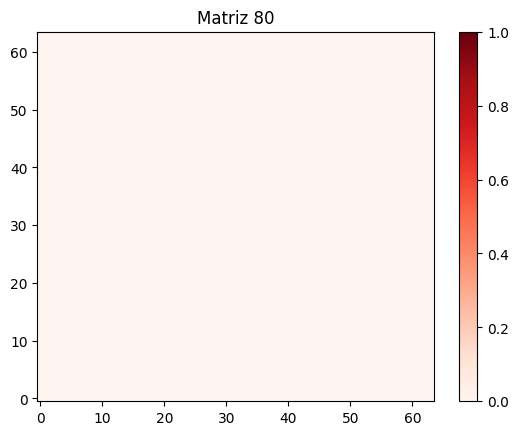

Matriz 81, valores: 0.0


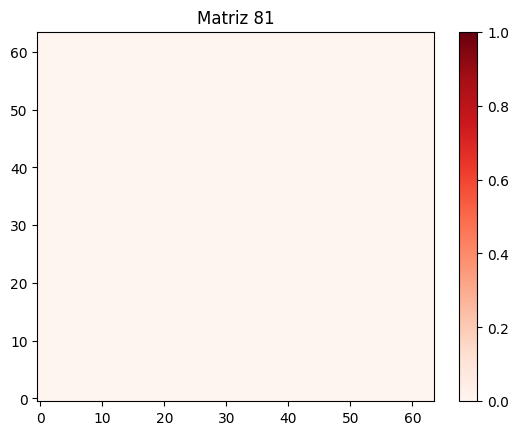

Matriz 82, valores: 0.0


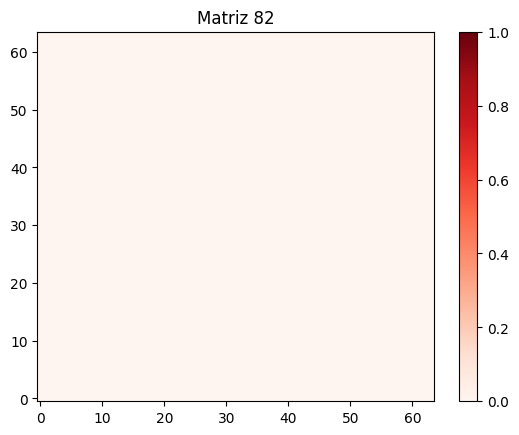

Matriz 83, valores: 6.0


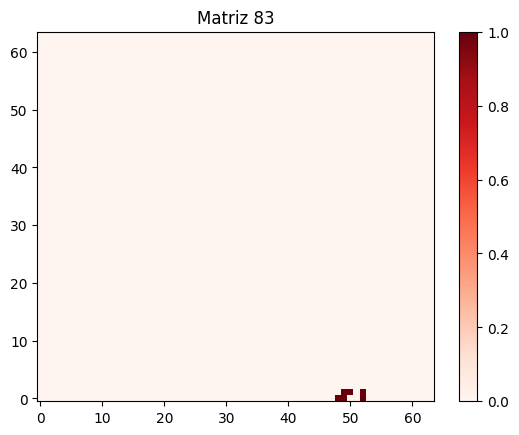

Matriz 84, valores: 6.0


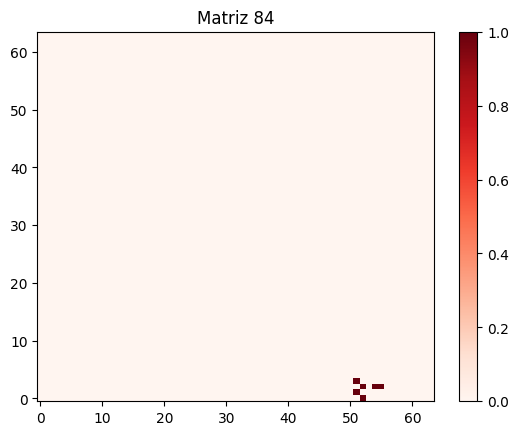

Matriz 85, valores: 3.0


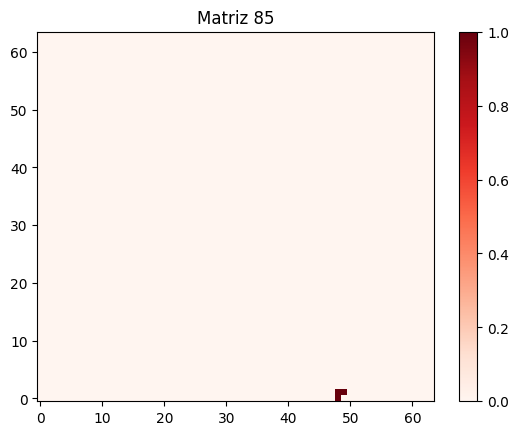

Matriz 86, valores: 0.0


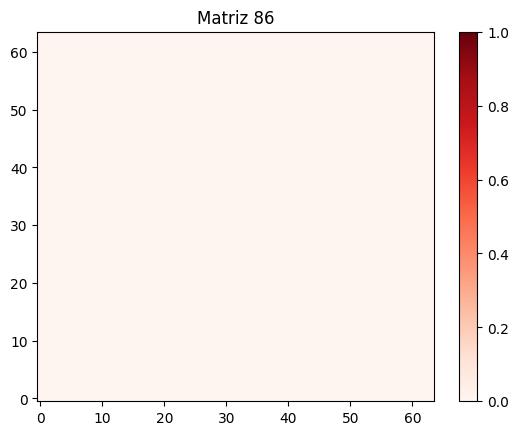

Matriz 87, valores: 0.0


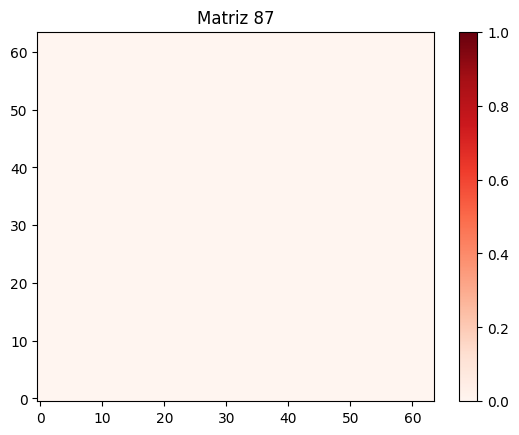

Matriz 88, valores: 0.0


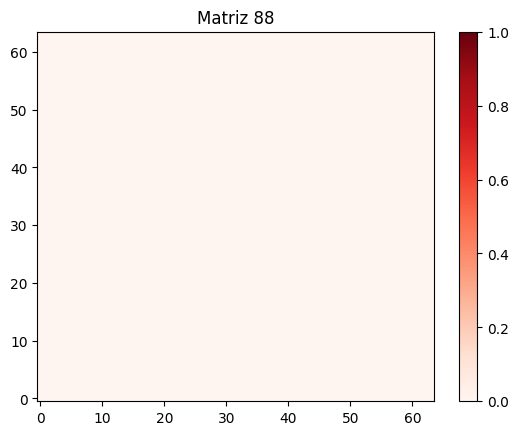

Matriz 89, valores: 0.0


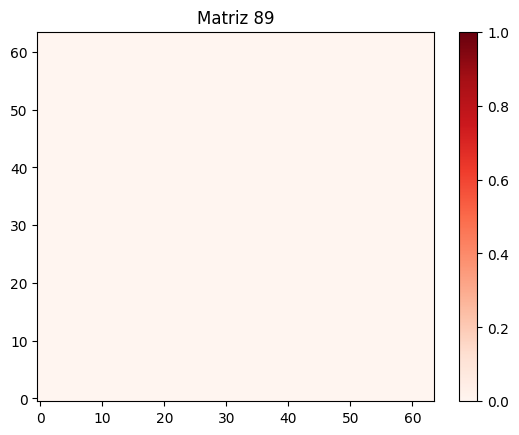

Matriz 90, valores: 0.0


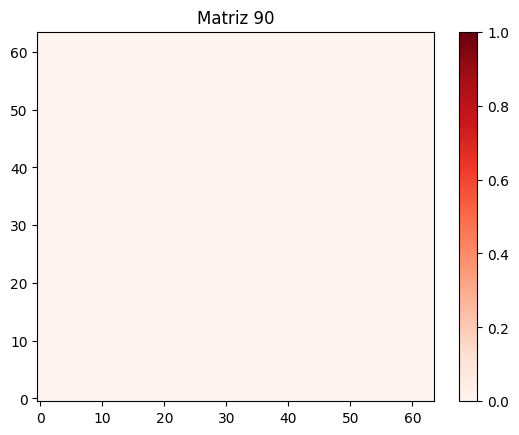

Matriz 91, valores: 0.0


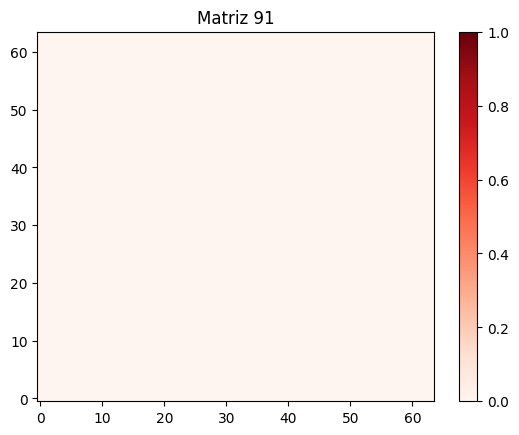

Matriz 92, valores: 0.0


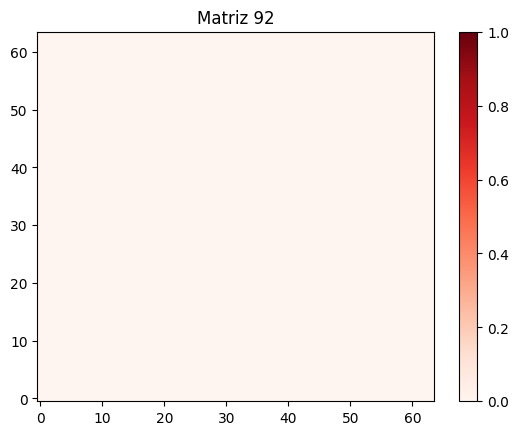

Matriz 93, valores: 1.0


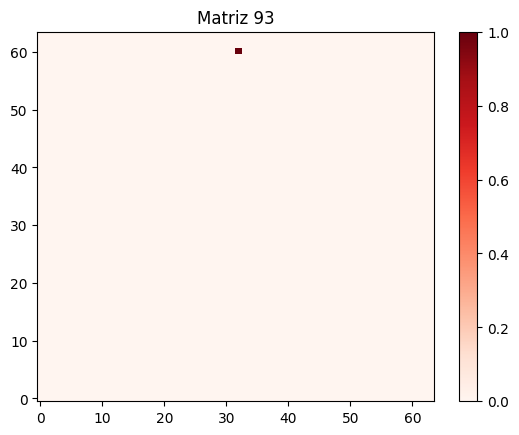

Matriz 94, valores: 0.0


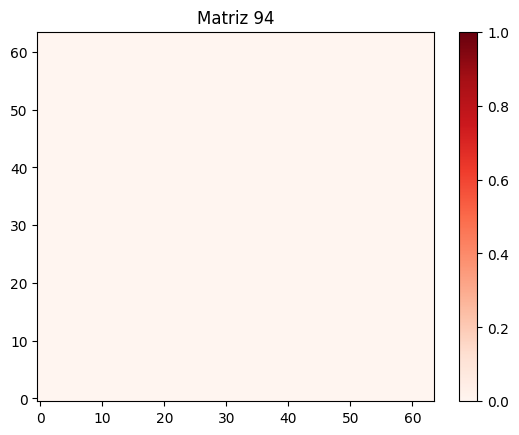

Matriz 95, valores: 0.0


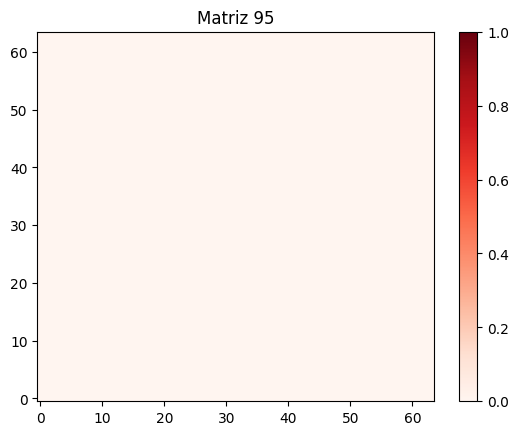

Matriz 96, valores: 0.0


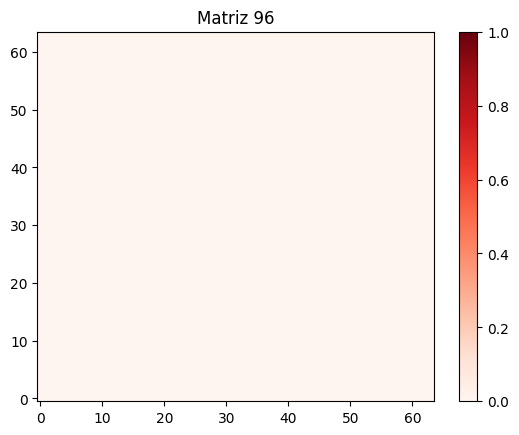

Matriz 97, valores: 0.0


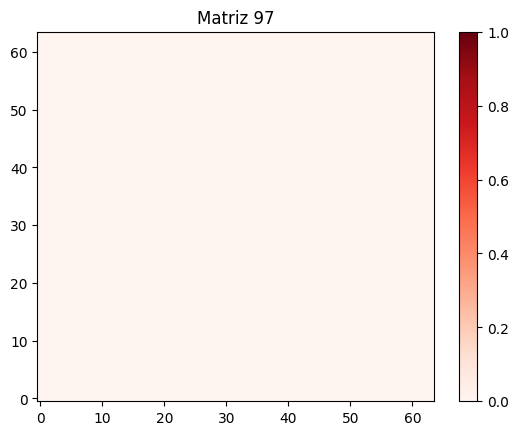

Matriz 98, valores: 0.0


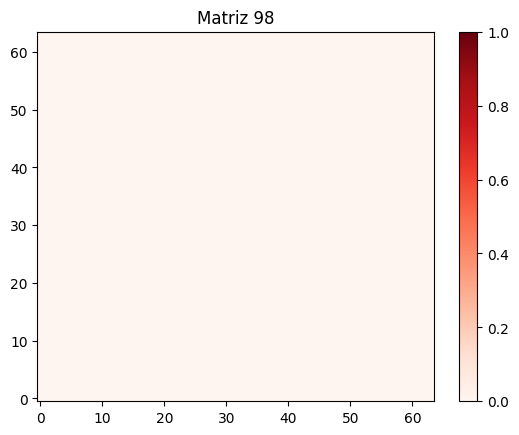

Matriz 99, valores: 1.0


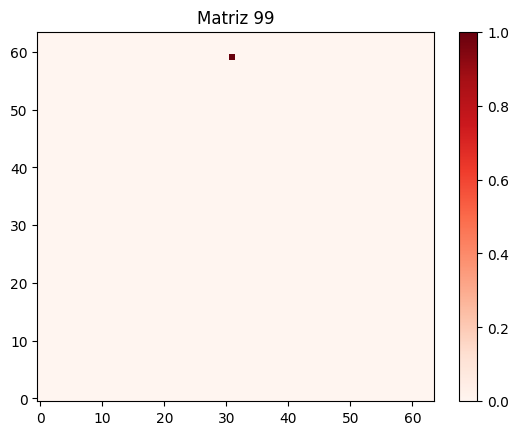

Matriz 100, valores: 0.0


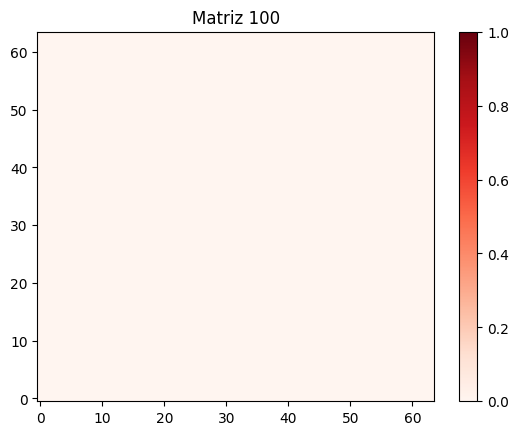

Matriz 101, valores: 0.0


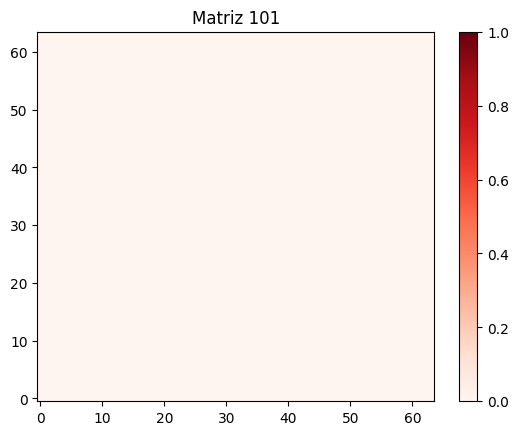

Matriz 102, valores: 0.0


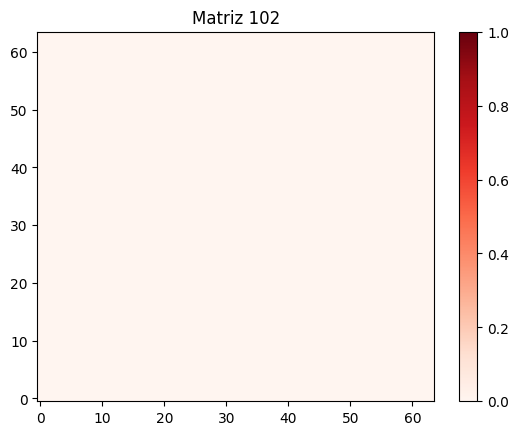

Matriz 103, valores: 0.0


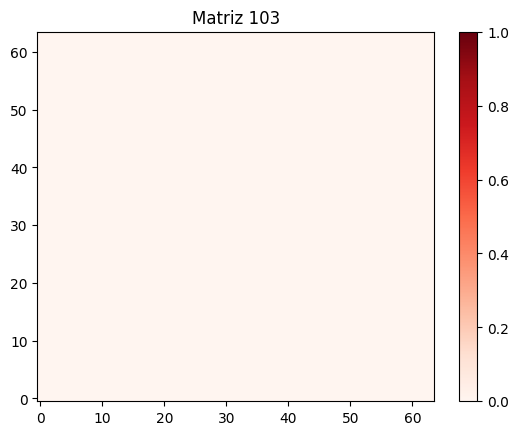

Matriz 104, valores: 0.0


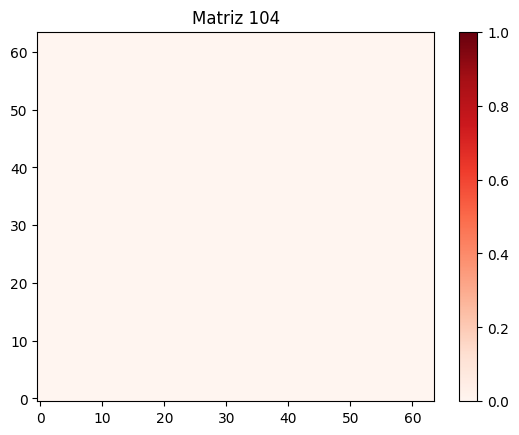

Matriz 105, valores: 13.0


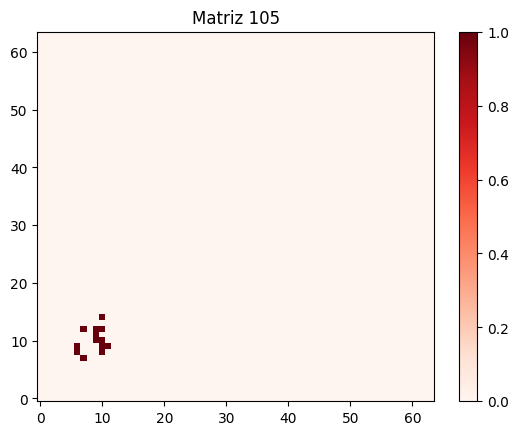

Matriz 106, valores: 0.0


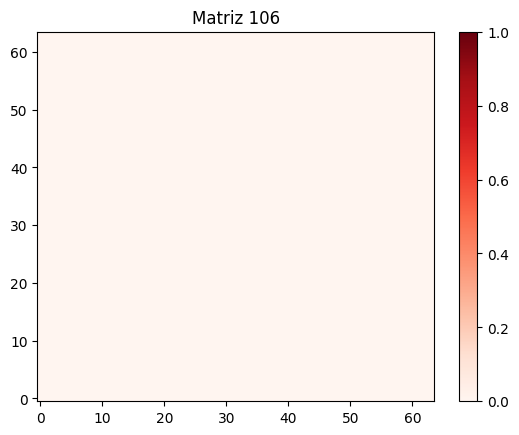

Matriz 107, valores: 0.0


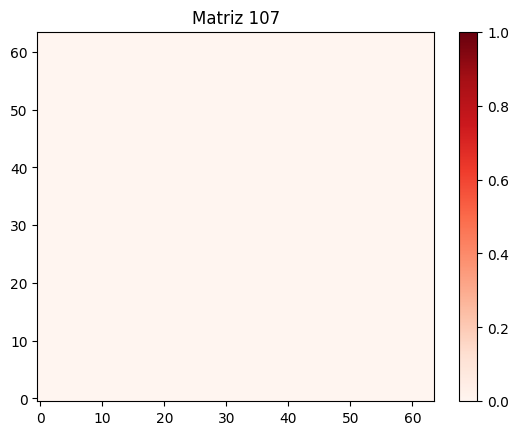

Matriz 108, valores: 0.0


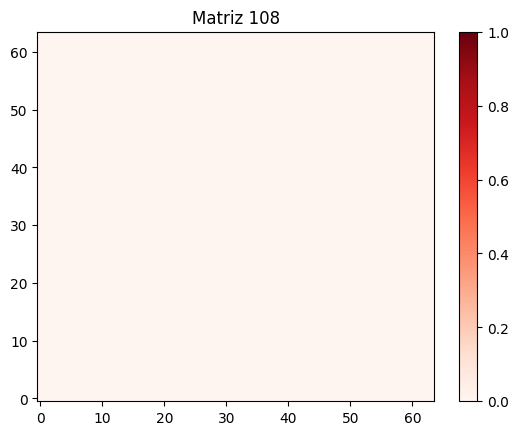

Matriz 109, valores: 0.0


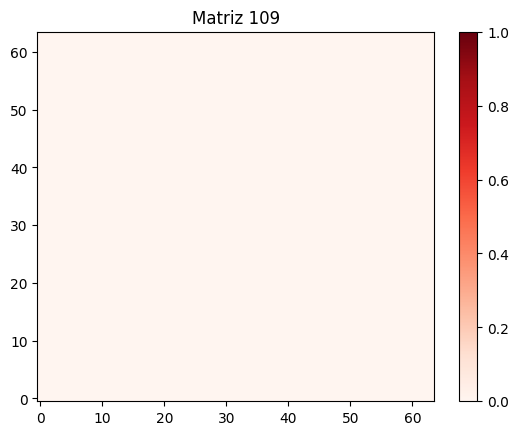

Matriz 110, valores: 0.0


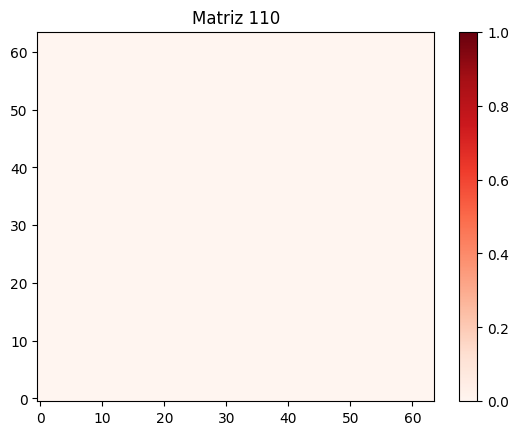

Matriz 111, valores: 0.0


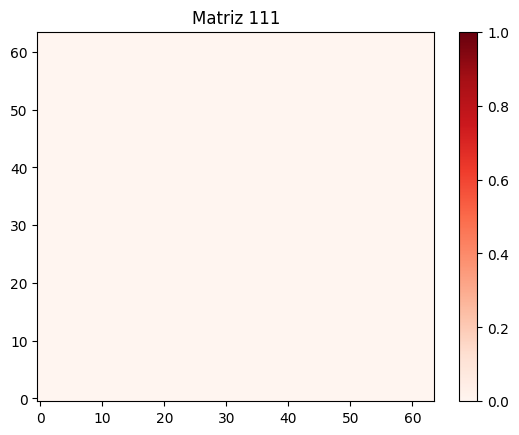

Matriz 112, valores: 0.0


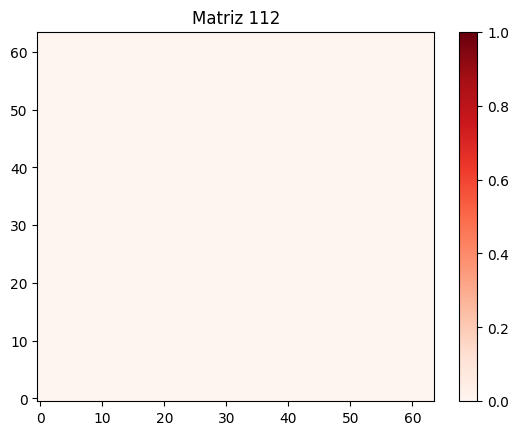

Matriz 113, valores: 0.0


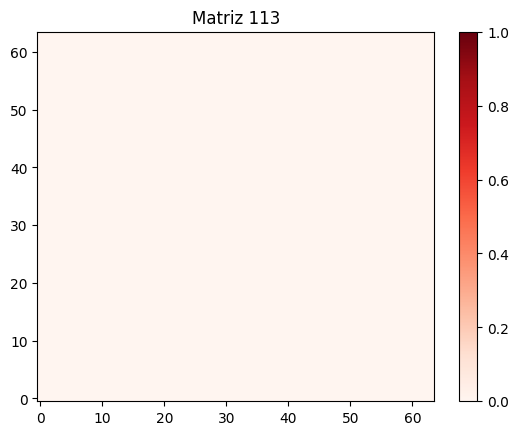

Matriz 114, valores: 0.0


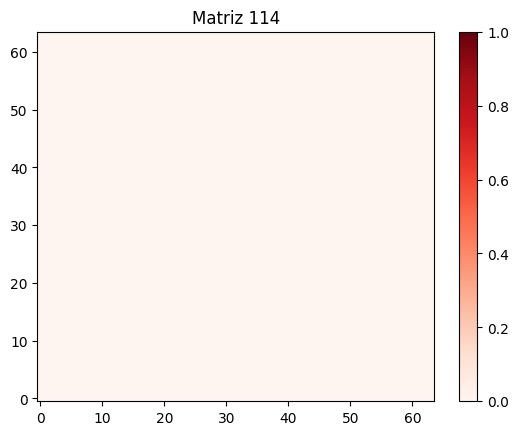

Matriz 115, valores: 0.0


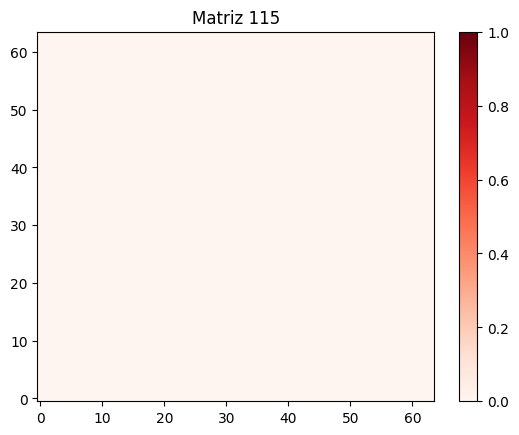

Matriz 116, valores: 1.0


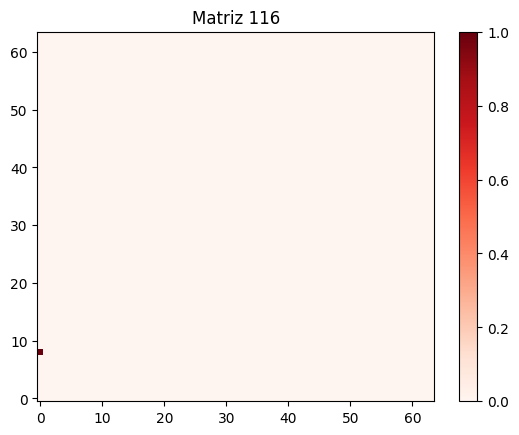

Matriz 117, valores: 0.0


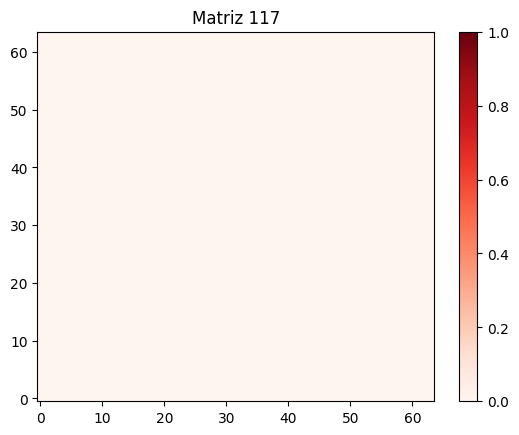

Matriz 118, valores: 0.0


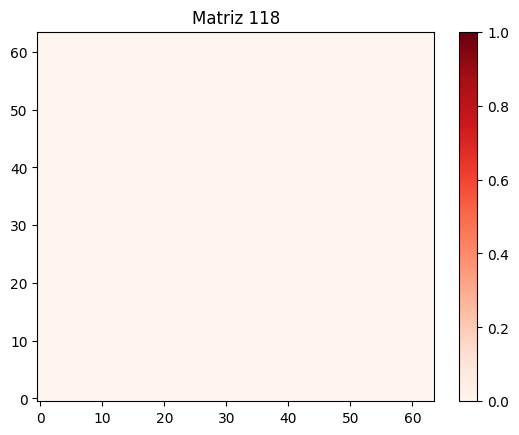

Matriz 119, valores: 0.0


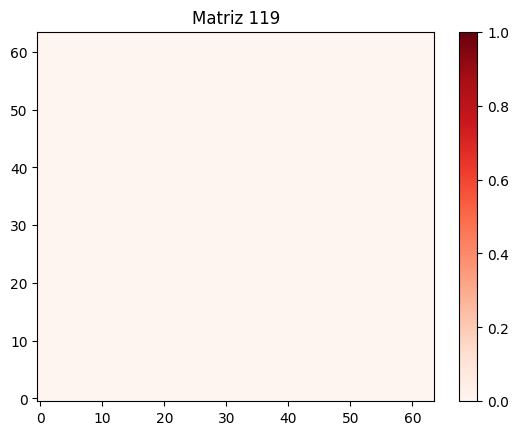

Matriz 120, valores: 0.0


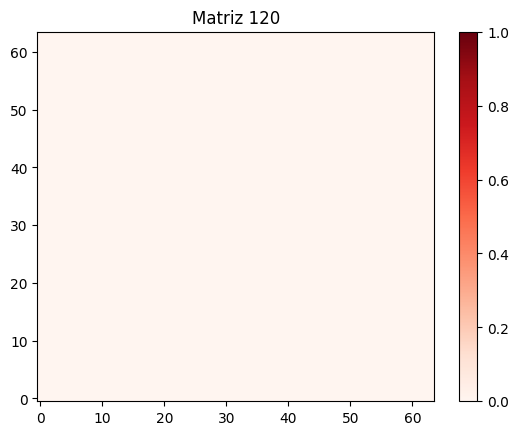

Matriz 121, valores: 0.0


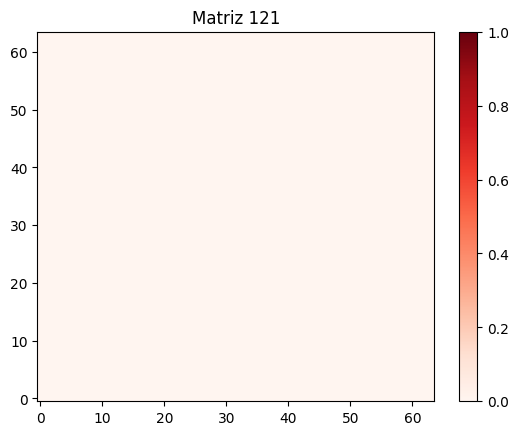

Matriz 122, valores: 0.0


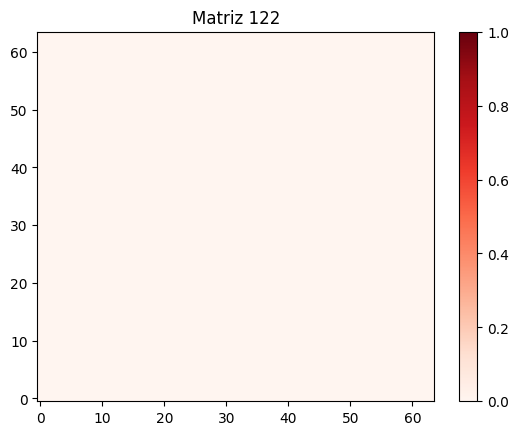

Matriz 123, valores: 0.0


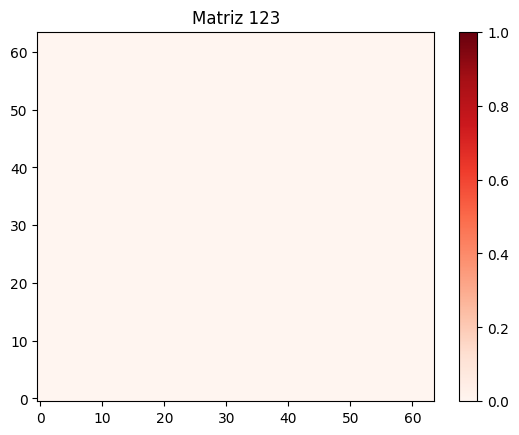

Matriz 124, valores: 2.0


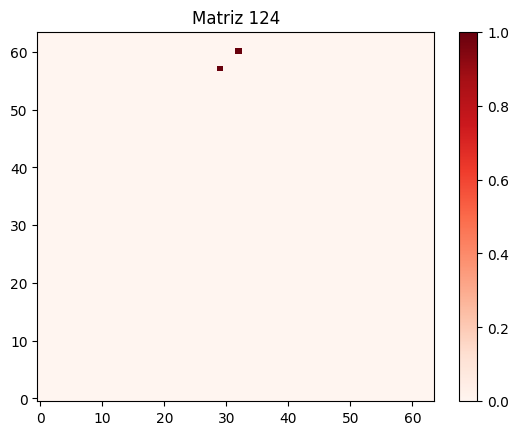

Matriz 125, valores: 0.0


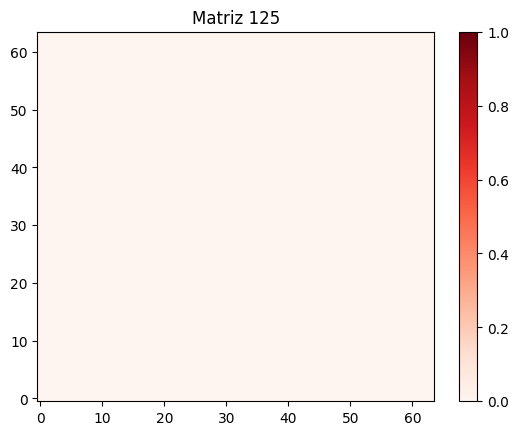

Matriz 126, valores: 0.0


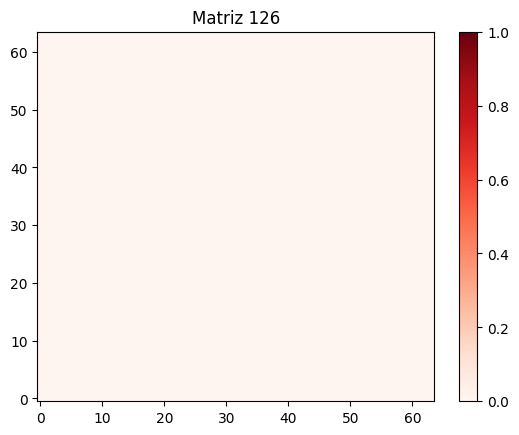

Matriz 127, valores: 0.0


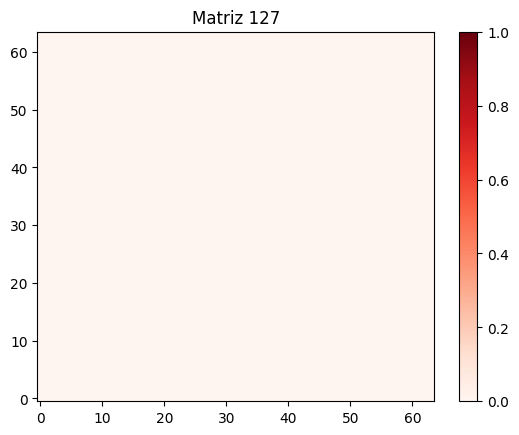

Matriz 128, valores: 0.0


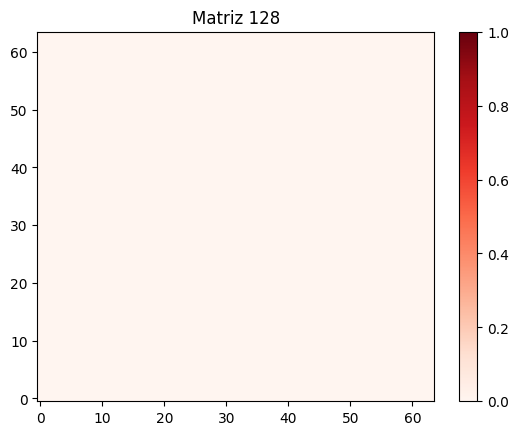

Matriz 129, valores: 0.0


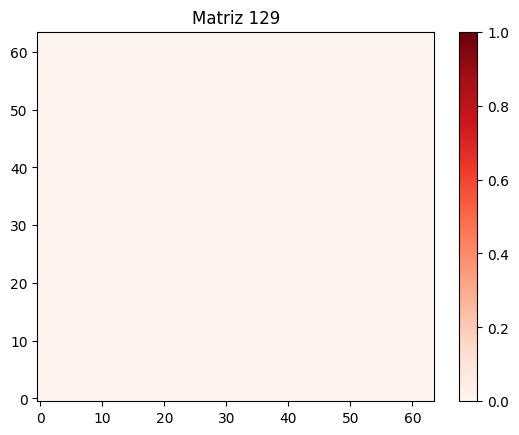

Matriz 130, valores: 0.0


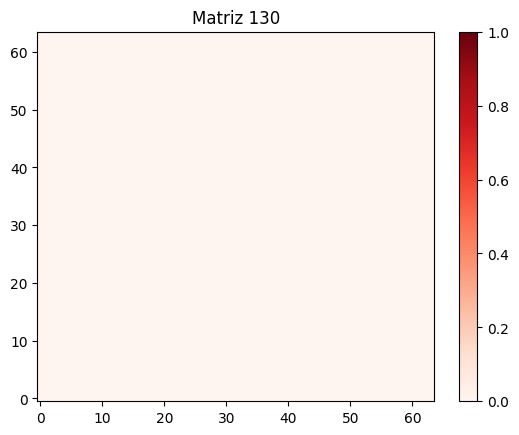

Matriz 131, valores: 0.0


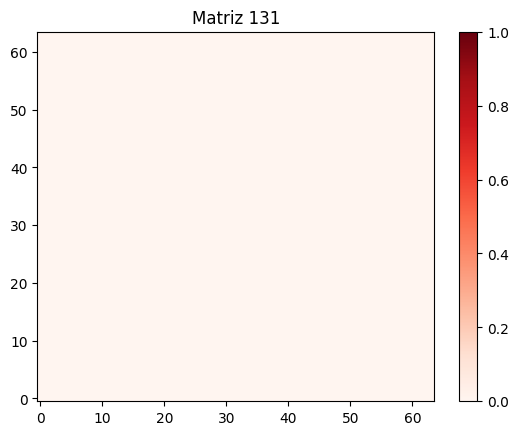

Matriz 132, valores: 0.0


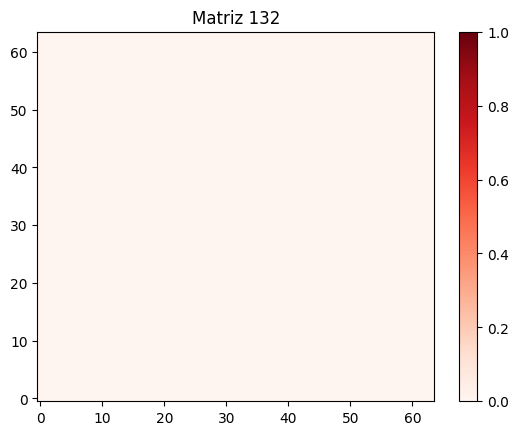

Matriz 133, valores: 1.0


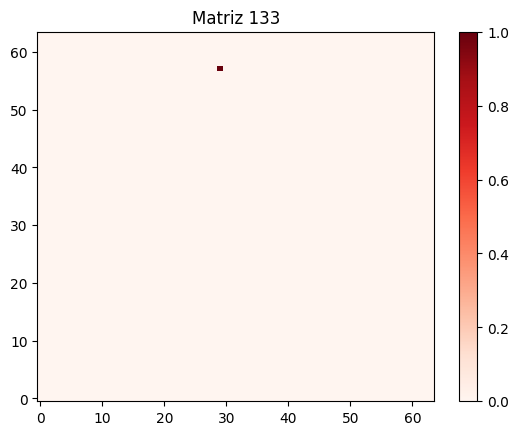

Matriz 134, valores: 0.0


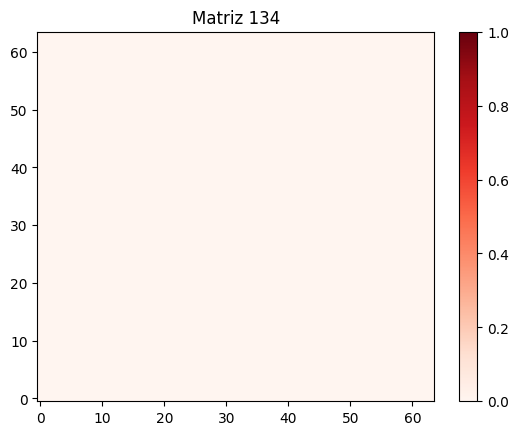

Matriz 135, valores: 0.0


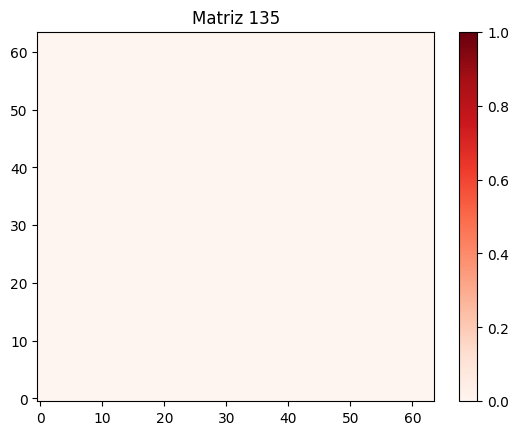

Matriz 136, valores: 0.0


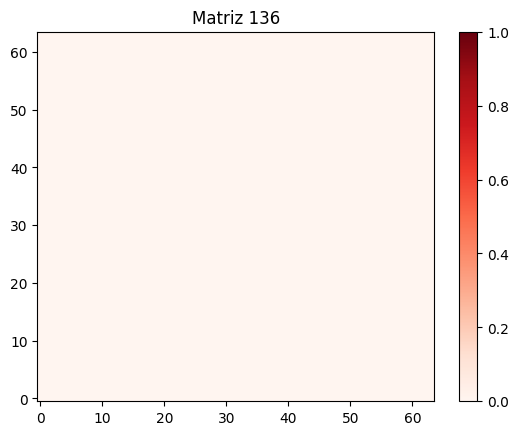

Matriz 137, valores: 0.0


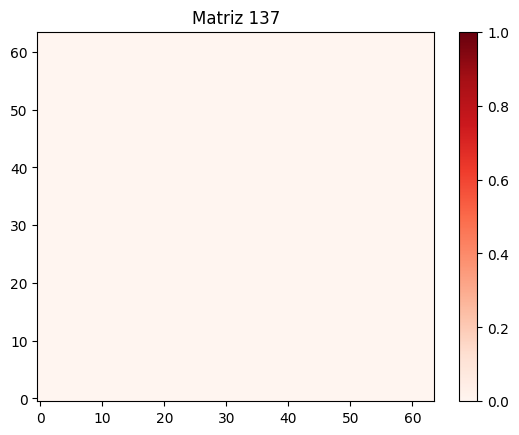

Matriz 138, valores: 0.0


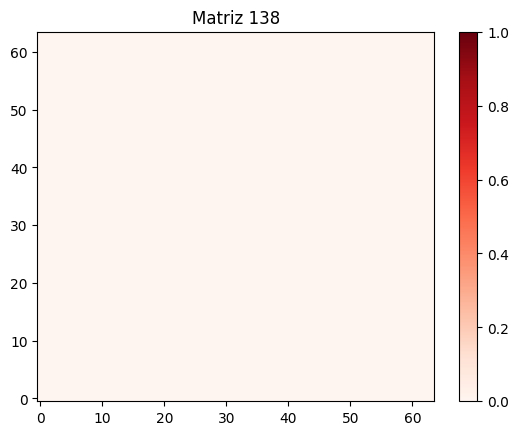

Matriz 139, valores: 0.0


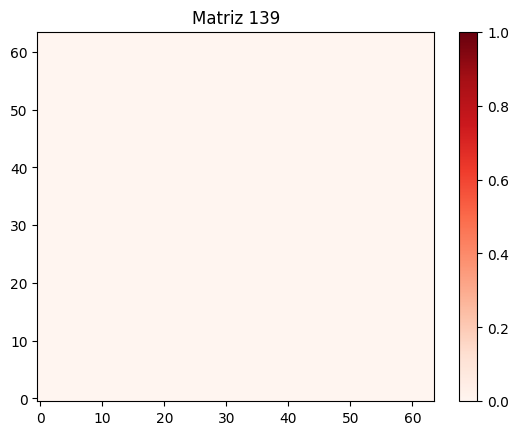

Matriz 140, valores: 0.0


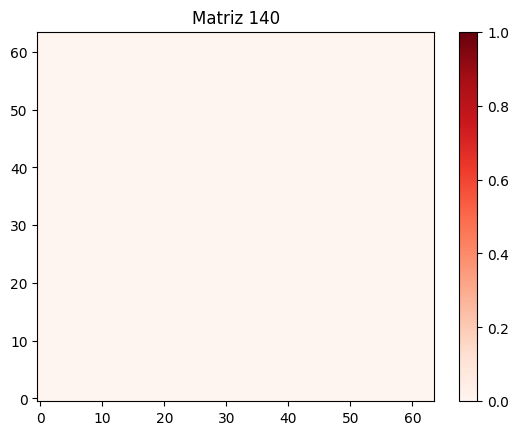

Matriz 141, valores: 0.0


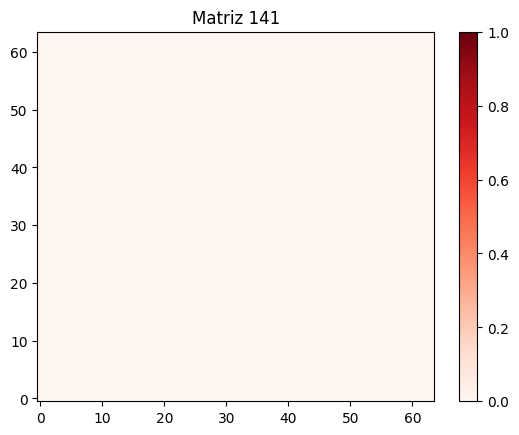

Matriz 142, valores: 0.0


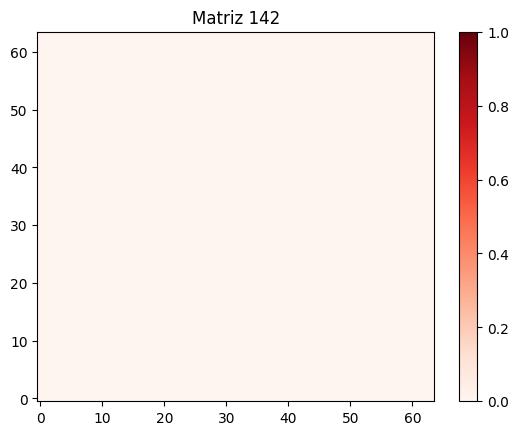

Matriz 143, valores: 0.0


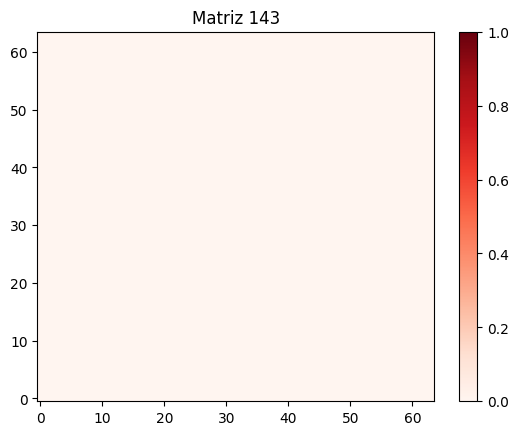

Matriz 144, valores: 0.0


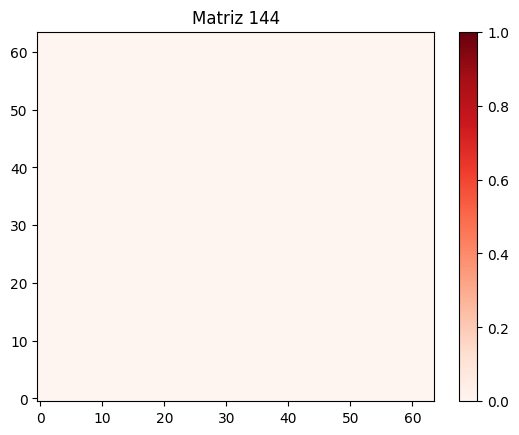

Matriz 145, valores: 0.0


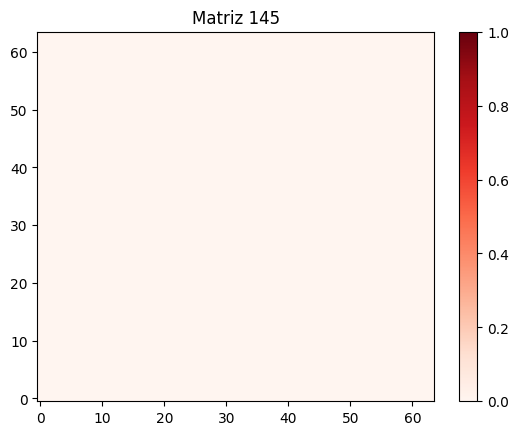

Matriz 146, valores: 0.0


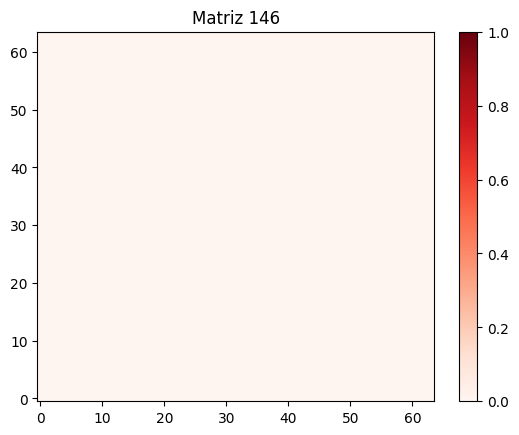

Matriz 147, valores: 0.0


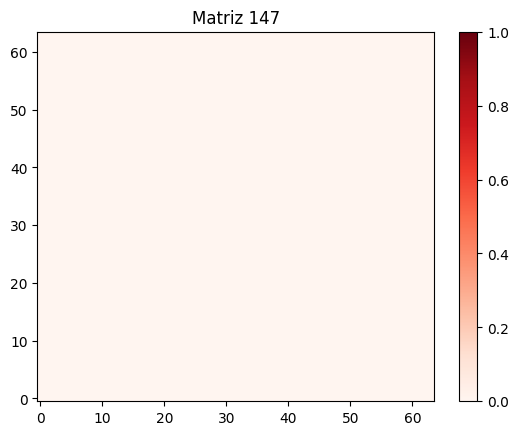

Matriz 148, valores: 0.0


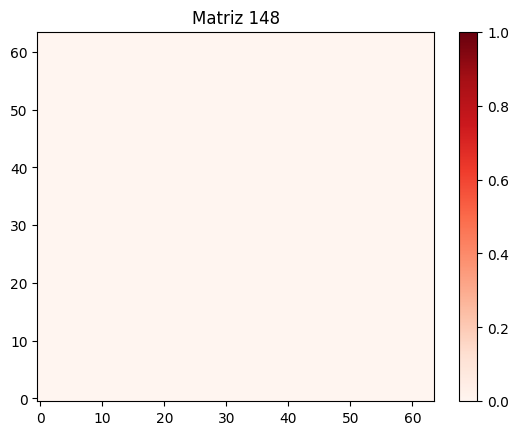

Matriz 149, valores: 0.0


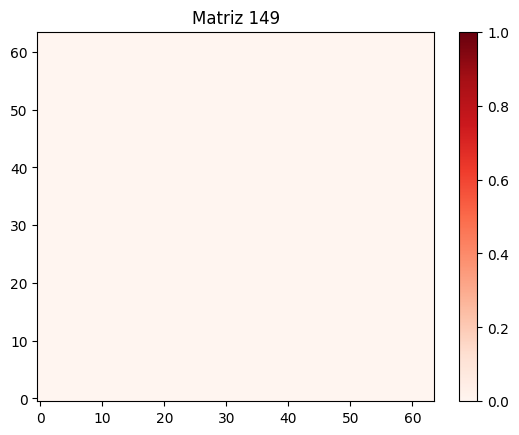

Matriz 150, valores: 0.0


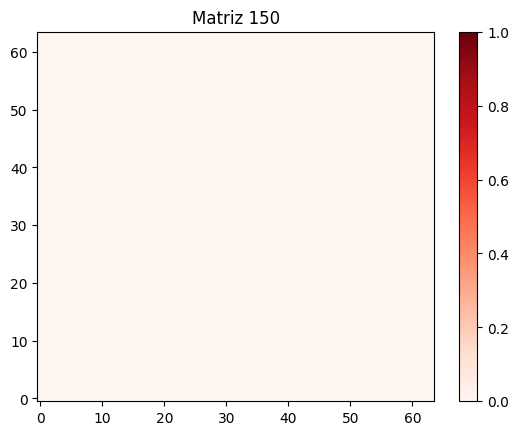

Matriz 151, valores: 0.0


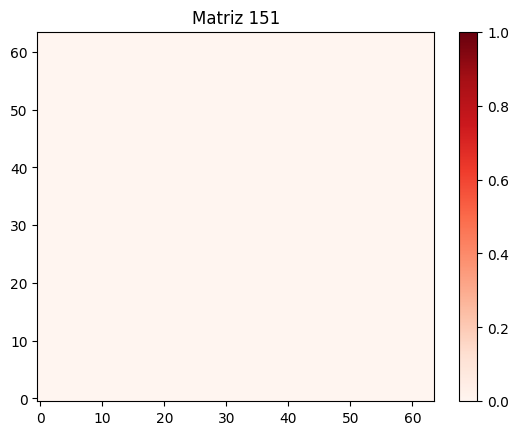

Matriz 152, valores: 0.0


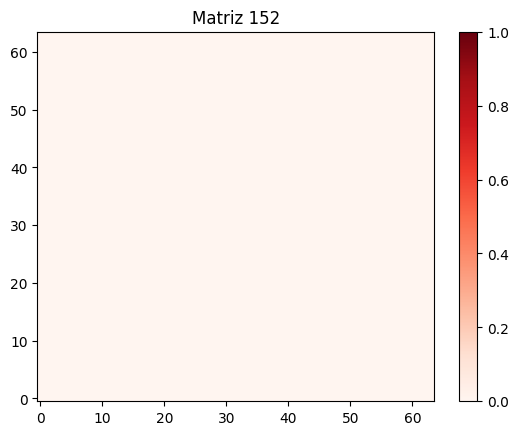

Matriz 153, valores: 0.0


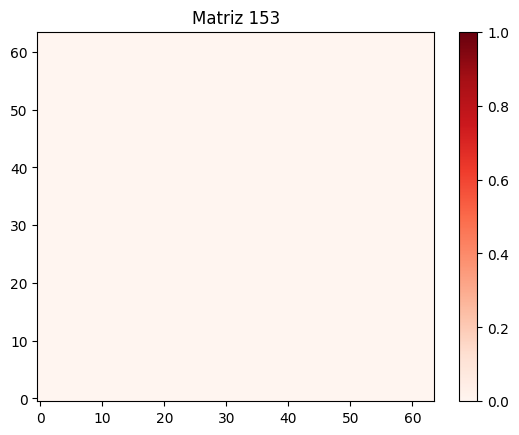

Matriz 154, valores: 0.0


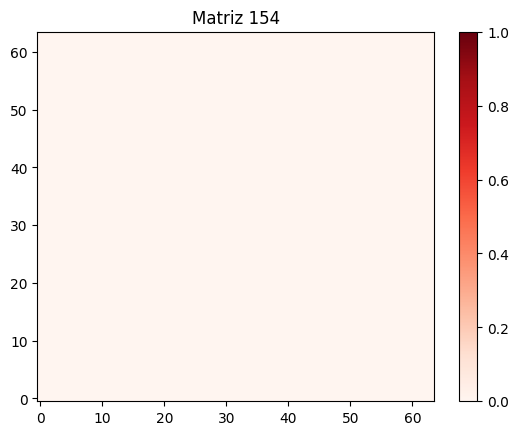

Matriz 155, valores: 0.0


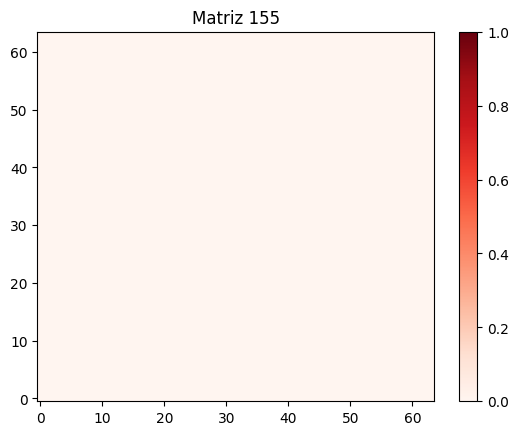

Matriz 156, valores: 0.0


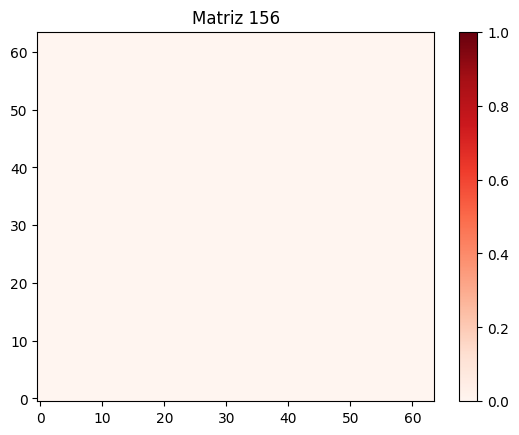

Matriz 157, valores: 0.0


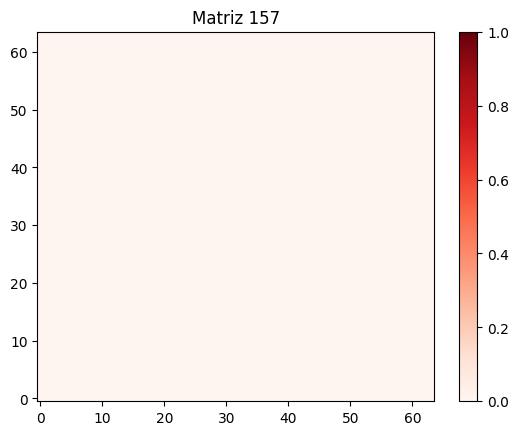

Matriz 158, valores: 0.0


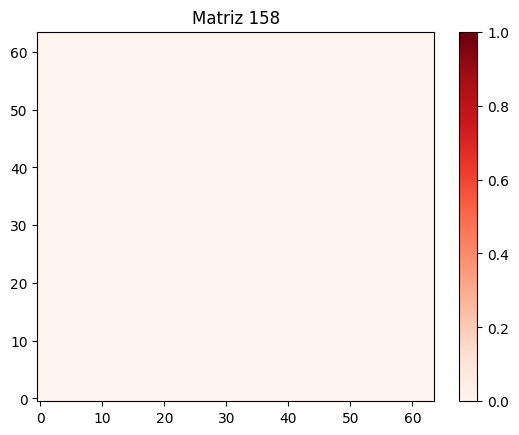

Matriz 159, valores: 0.0


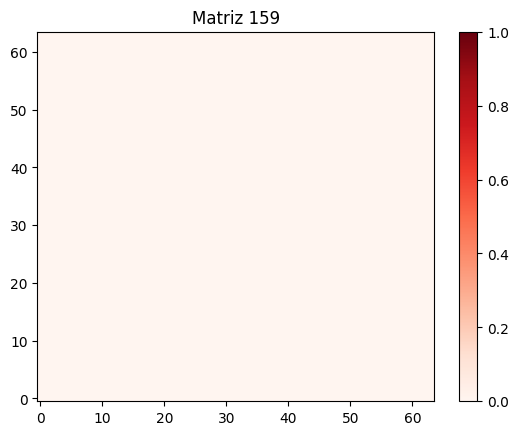

Matriz 160, valores: 0.0


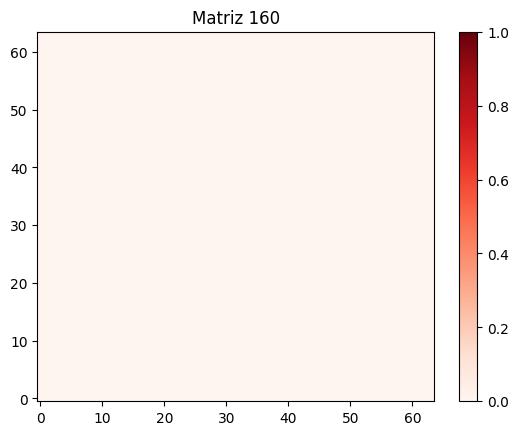

Matriz 161, valores: 0.0


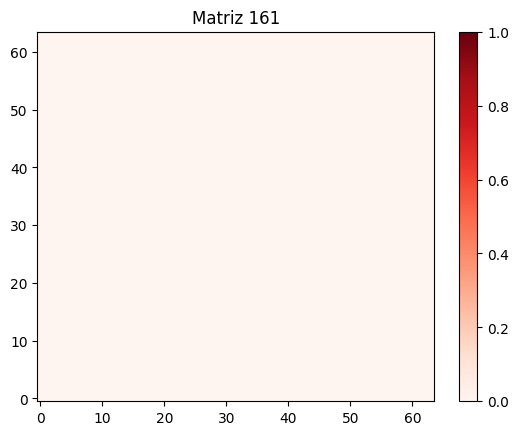

Matriz 162, valores: 0.0


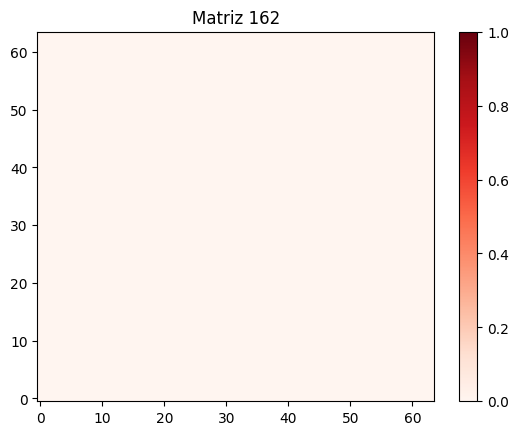

Matriz 163, valores: 0.0


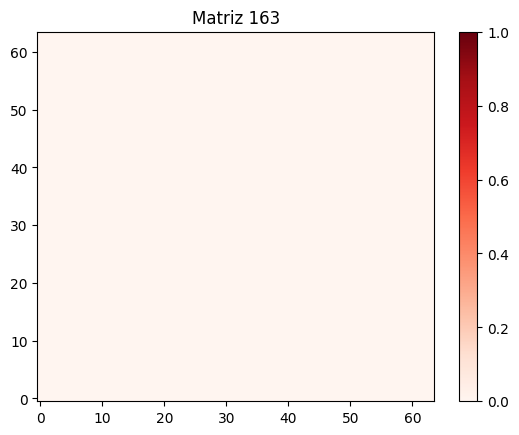

Matriz 164, valores: 0.0


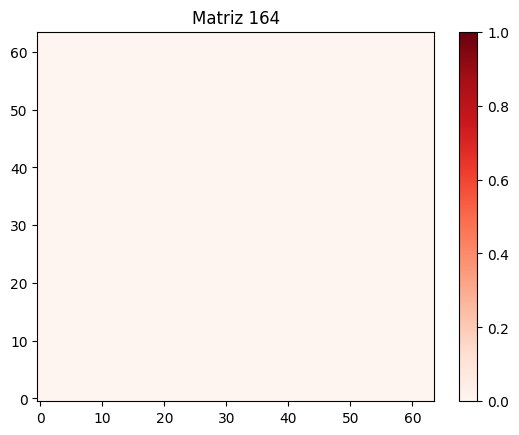

Matriz 165, valores: 0.0


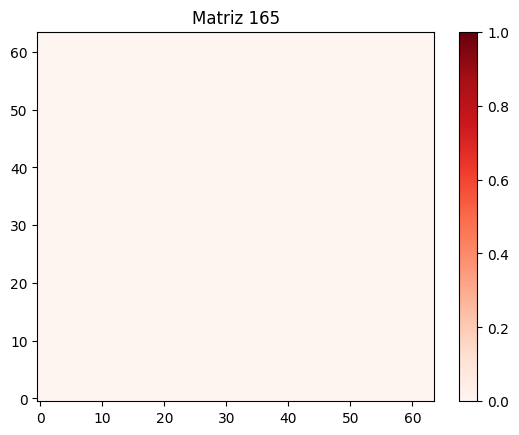

Matriz 166, valores: 0.0


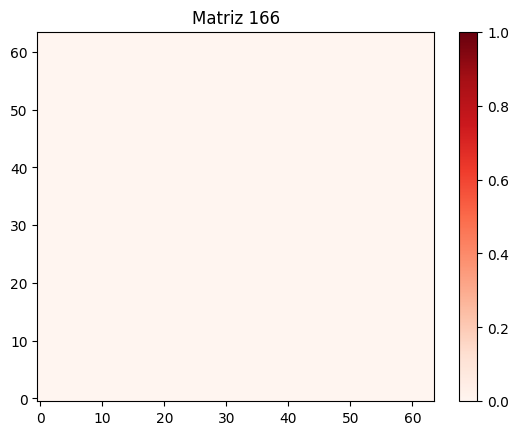

Matriz 167, valores: 0.0


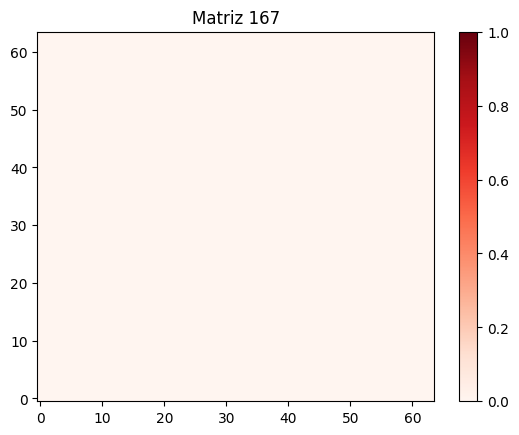

Matriz 168, valores: 0.0


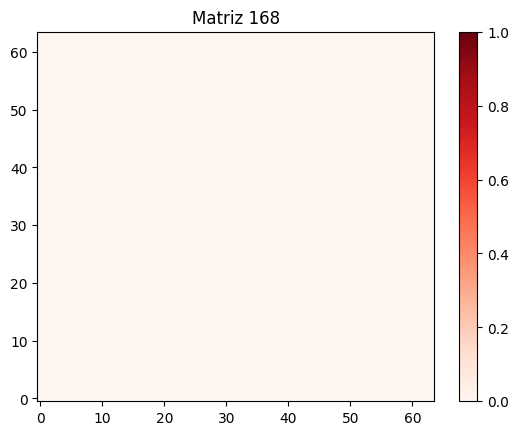

Matriz 169, valores: 1.0


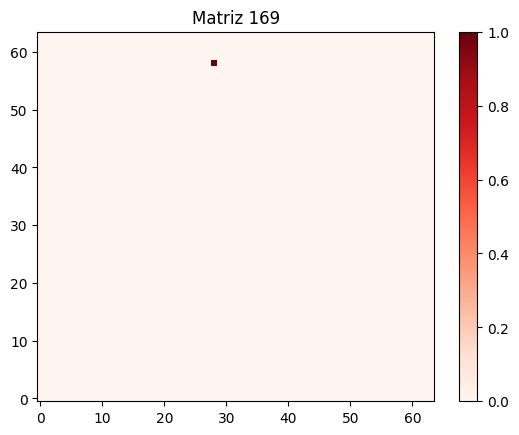

Matriz 170, valores: 0.0


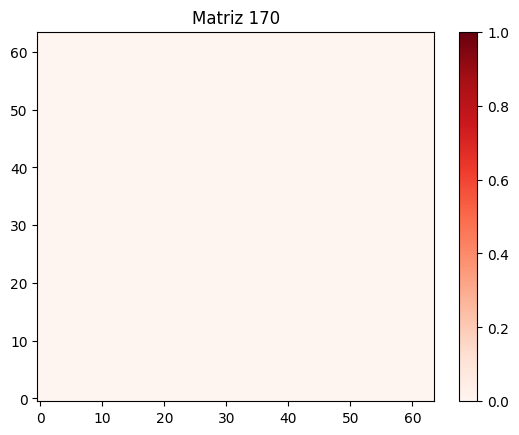

Matriz 171, valores: 0.0


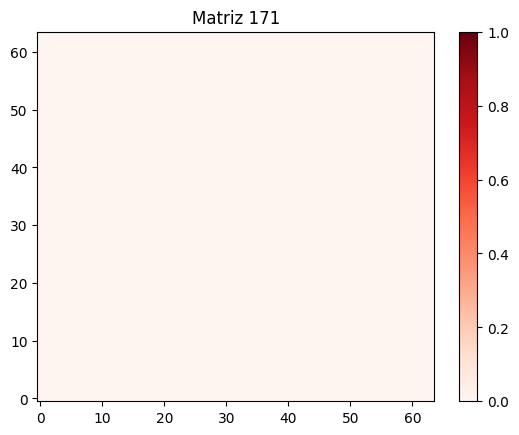

Matriz 172, valores: 0.0


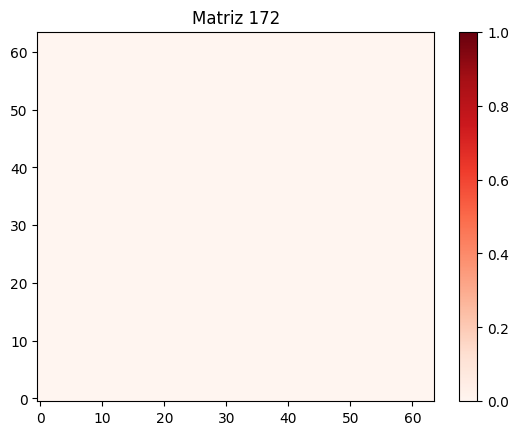

Matriz 173, valores: 0.0


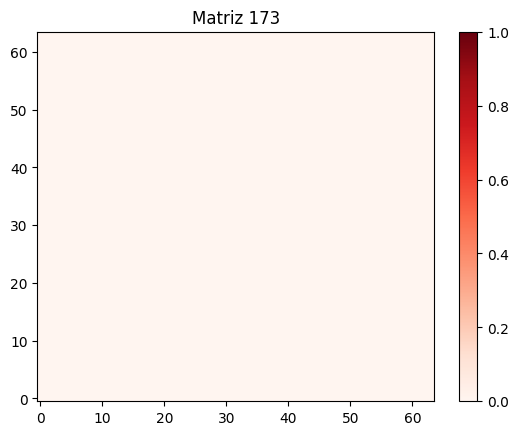

Matriz 174, valores: 1.0


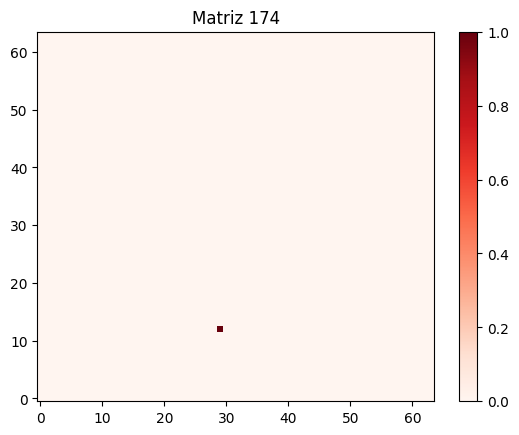

Matriz 175, valores: 0.0


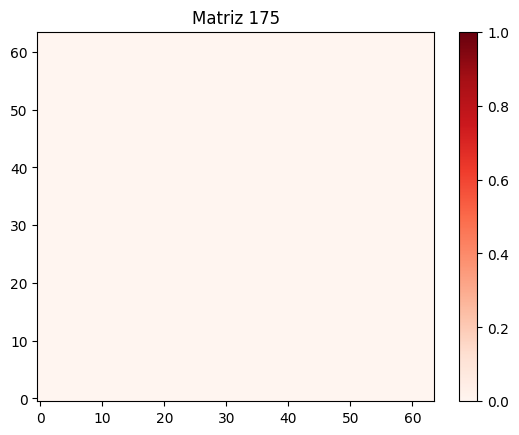

Matriz 176, valores: 2.0


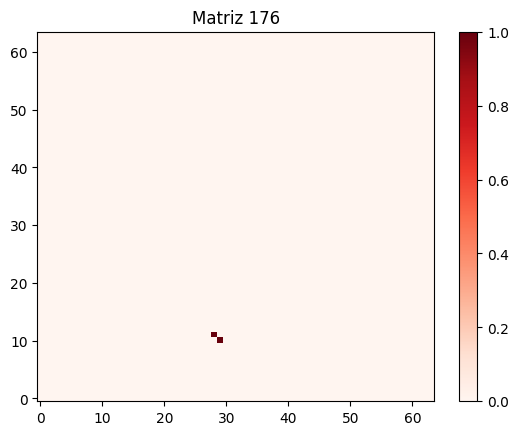

Matriz 177, valores: 1.0


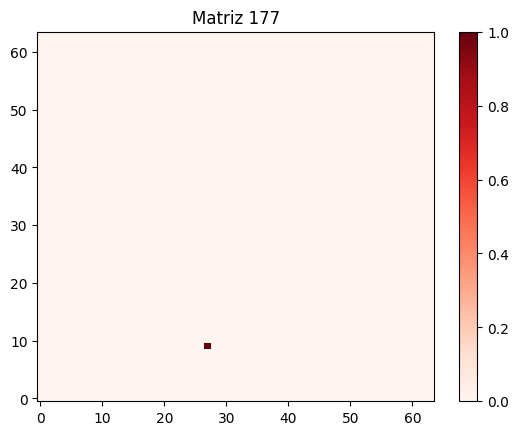

Matriz 178, valores: 3.0


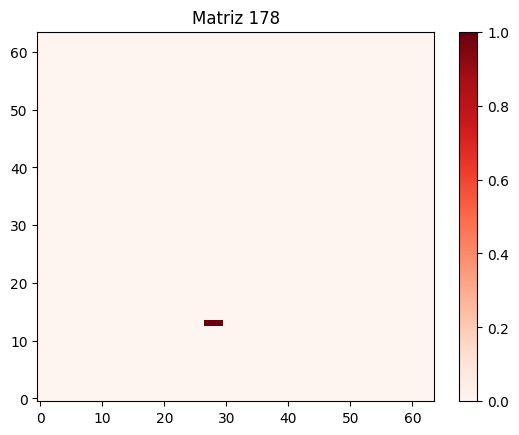

Matriz 179, valores: 7.0


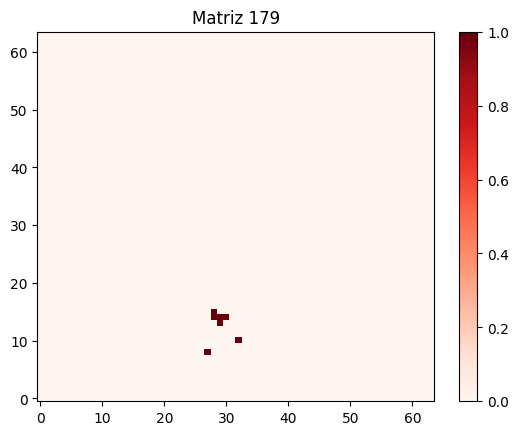

Matriz 180, valores: 2.0


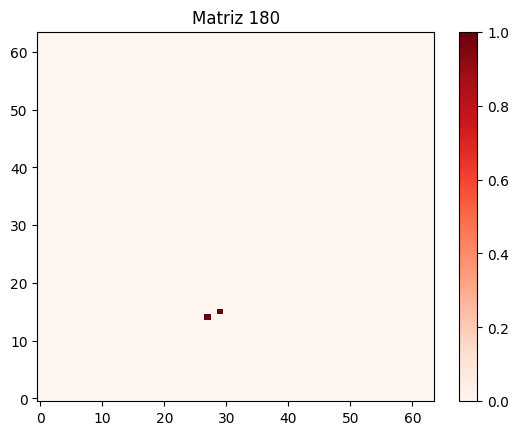

In [50]:
# Imprime todas las matrices
for i, matrix in enumerate(matrices[-180:]):
    print(f"Matriz {i+1}, valores: {matrix.sum()}")
    plt.imshow(matrix, cmap='Reds', interpolation='nearest', origin='lower', vmin=0, vmax=1, aspect='auto')
    plt.colorbar()
    plt.title(f"Matriz {i+1}")
    plt.show()



**Generacion de las historias**

Con las imagenes se generan historias de 5(Esto puede modificarse dependiendo el caso) imagenes secuenciales las cuales serviran en algun modelo de prediccion ya que las imagenes tienen secuencia.


In [51]:
historial=[]
for i in range(len(matrices)-4):
    historial.append([matrices[i], matrices[i+1],matrices[i+2],matrices[i+3], matrices[i+4]])
np.shape(historial)

(2761, 5, 64, 64)

**Resultados del proceso**
En este ejemplo se obtiene lo siguiente.

(2761, 5, 64, 64)

(muestras, imagenes, renglones, columnas)

El 2761 representa las secuencias que se tienen, en este caso son 98.

Cada secuencia esta compuesta por 5 imagenes, normalmente en los articulos les llaman frames.

Cada imagen es de tamaño 64x64.

Este conjunto de imagenes ya podria utilizarse en algunos modelos predictivos

**Guardando resultados**

In [52]:
np.save('historial_1D', historial)

# **ENTRENAMIENTO DEL MODELO**

In [53]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

**Se carga los archivos con las matrices para el entrenamiento**

In [54]:
%%time
dataset = np.load("historial_1D.npy")

CPU times: user 342 µs, sys: 143 ms, total: 143 ms
Wall time: 144 ms


**Forma de los datos**
El conjunto de datos consta de 2761 secuencias de 5 imagenes de 64x64

In [55]:
dataset.shape

(2761, 5, 64, 64)

In [56]:
# Add a channel dimension since the images are grayscale.
dataset = np.expand_dims(dataset, axis=-1)
dataset.shape

(2761, 5, 64, 64, 1)

Se normalizan los datos entre 0 y 1 (En este ejemplo no es necesario ya que el valor maximo posible es 1)

Se utiliza el 80% de los datos para entrenamiento y otro 20% para validacion

In [57]:
# Split into train and validation sets using indexing to optimize memory.
indexes = np.arange(dataset.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.8 * dataset.shape[0])]
val_index = indexes[int(0.8 * dataset.shape[0]) :]
train_dataset = dataset[train_index]
val_dataset = dataset[val_index]



#Los datos ya estan entre 0 y 1

# Normalize the data to the 0-1 range.
#train_dataset = train_dataset / 255
#val_dataset = val_dataset / 255

# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y


# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (2208, 4, 64, 64, 1), (2208, 4, 64, 64, 1)
Validation Dataset Shapes: (553, 4, 64, 64, 1), (553, 4, 64, 64, 1)


**Visualizacion de un ejemplo de secuencia**

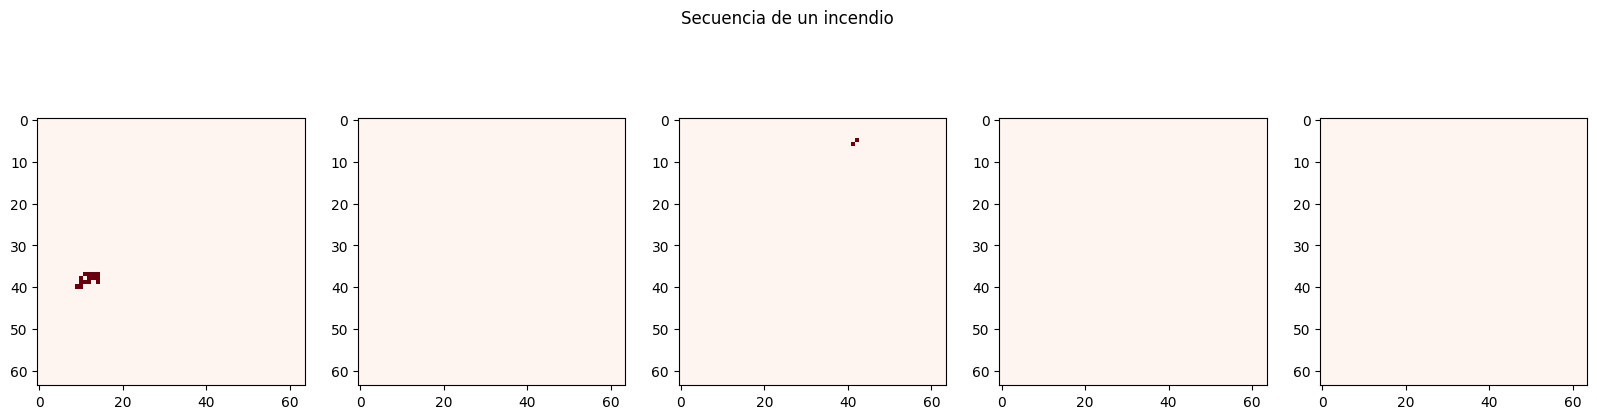

In [63]:
# Encuentra las secuencias que tienen al menos una matriz con un incendio y el tamaño de cada incendio
indices_with_fires = [(i, max(matrix.sum() for matrix in seq)) for i, seq in enumerate(train_dataset) if any(matrix.sum() > 0 for matrix in seq)]

# Si no hay secuencias con incendios, termina el script aquí
if not indices_with_fires:
    print("No hay secuencias con incendios.")
else:
    # Ordena las secuencias por el tamaño del incendio más grande en cada una y selecciona la más grande
    indices_with_fires.sort(key=lambda x: x[1], reverse=True)
    data_choice, _ = indices_with_fires[0]

    # Muestra las matrices de la secuencia seleccionada
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    fig.suptitle('Secuencia de un incendio')
    for i, ax in enumerate(axes):
        ax.imshow(train_dataset[data_choice][i], cmap='Reds', vmin=0, vmax=1)
    plt.show()




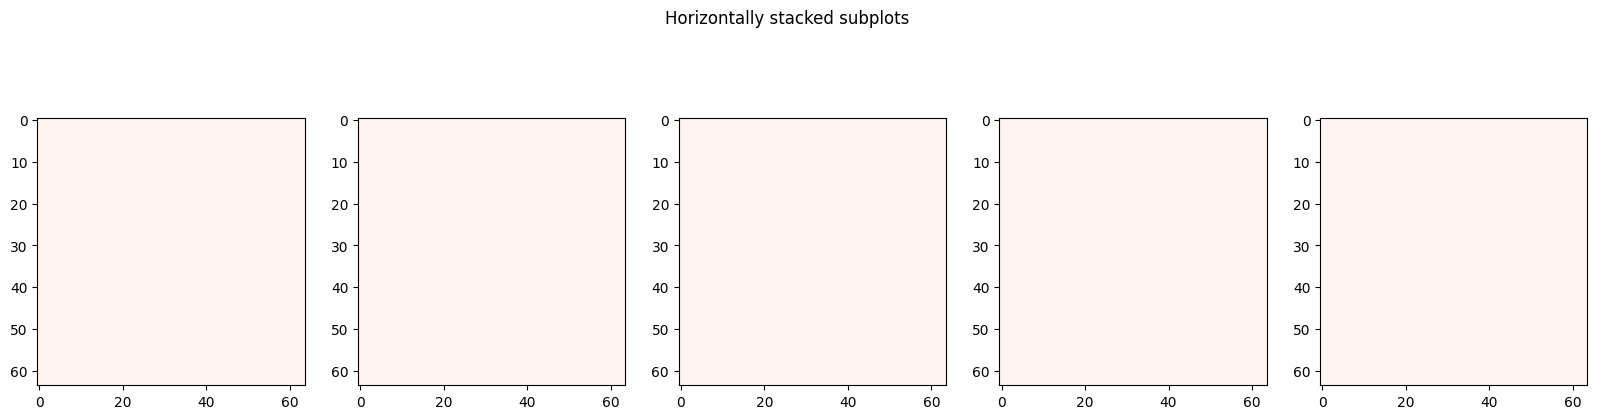

In [61]:
# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]



fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,5))
fig.suptitle('Horizontally stacked subplots')
ax1.imshow(train_dataset[data_choice][0], cmap='Reds', vmin=0, vmax=1)
ax2.imshow(train_dataset[data_choice][1], cmap='Reds', vmin=0, vmax=1)
ax3.imshow(train_dataset[data_choice][2], cmap='Reds', vmin=0, vmax=1)
ax4.imshow(train_dataset[data_choice][3], cmap='Reds', vmin=0, vmax=1)
ax5.imshow(train_dataset[data_choice][4], cmap='Reds', vmin=0, vmax=1)

**Construccion del modelo**

Aqui se podria modificar en base a muchas variables como el tipo de conjunto de datos, cuantos datos se tienen, que tan complejo es el problema entre otras cosas, en general se toma de base modelo y se va analizando posibles cambios que se puedan realizar.

In [64]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

**Resumen del modelo**

In [65]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 64, 64, 1   0         
                             )]                                  
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, None, 64, 64, 64   416256    
                             )                                   
                                                                 
 batch_normalization (Batch  (None, None, 64, 64, 64   256       
 Normalization)              )                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, None, 64, 64, 64   295168    
                             )                                   
                                                                 
 batch_normalization_1 (Bat  (None, None, 64, 64, 64   256   

**Se entrena el modelo**

In [66]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 20
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/20
442/442 [==============================] - 101s 188ms/step - loss: 0.0087 - val_loss: 4.0016e-04 - lr: 0.0010
Epoch 2/20
442/442 [==============================] - 79s 179ms/step - loss: 2.7924e-04 - val_loss: 2.8554e-04 - lr: 0.0010
Epoch 3/20
442/442 [==============================] - 83s 188ms/step - loss: 2.2459e-04 - val_loss: 2.4154e-04 - lr: 0.0010
Epoch 4/20
442/442 [==============================] - 80s 182ms/step - loss: 1.5727e-04 - val_loss: 2.1937e-04 - lr: 0.0010
Epoch 5/20
442/442 [==============================] - 80s 181ms/step - loss: 1.0956e-04 - val_loss: 2.0295e-04 - lr: 0.0010
Epoch 6/20
442/442 [==============================] - 80s 180ms/step - loss: 9.2918e-05 - val_loss: 1.5505e-04 - lr: 0.0010
Epoch 7/20
442/442 [==============================] - 85s 192ms/step - loss: 8.9758e-05 - val_loss: 1.1810e-04 - lr: 0.0010
Epoch 8/20
442/442 [==============================] - 80s 181ms/step - loss: 8.5675e-05 - val_loss: 1.4156e-04 - lr: 0.0010
Epoch 9/20


# **SIMULACION**

**Se utiliza el modelo para predecir la 5 imagenes y se visualiza. Aqui falta poner que agarre un incendio**

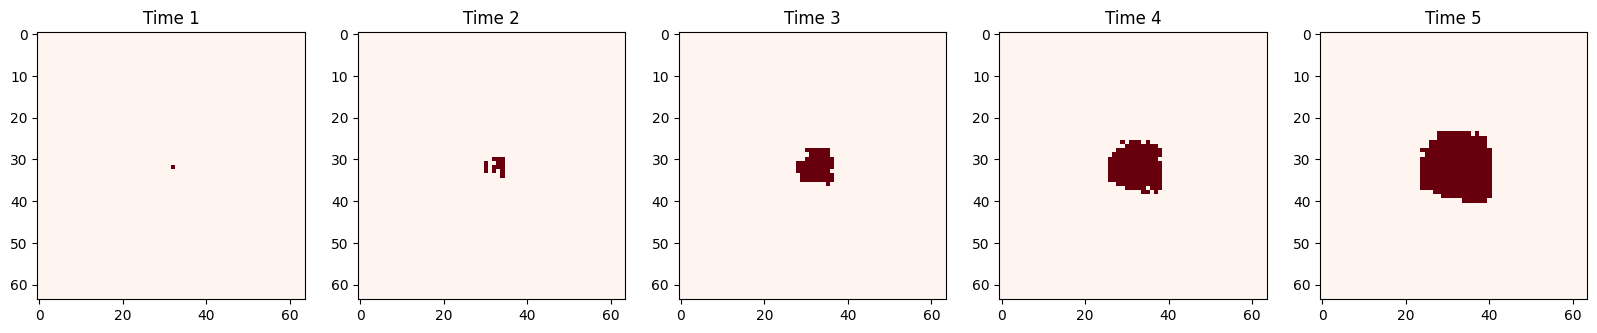

In [70]:
# Generate a more realistic fire sequence with a larger fire based on user feedback.
fire_sequence_large = np.zeros((5, 64, 64))

# Initialize the fire at the center
fire_sequence_large[0, 32, 32] = 1

# Propagate the fire
for t in range(1, 5):
    fire_sequence_large[t] = fire_sequence_large[t-1].copy()
    for i in range(64):
        for j in range(64):
            if fire_sequence_large[t-1, i, j] == 1:
                # Spread the fire to adjacent cells with some randomness
                for x in range(max(0, i-2), min(64, i+3)):
                    for y in range(max(0, j-2), min(64, j+3)):
                        if np.random.rand() > 0.5:
                            fire_sequence_large[t, x, y] = 1

# Plot the sequence
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(fire_sequence_large[i], cmap='Reds')
    axes[i].set_title(f"Time {i+1}")
plt.show()

1/1 [==============================] - 0s 160ms/step


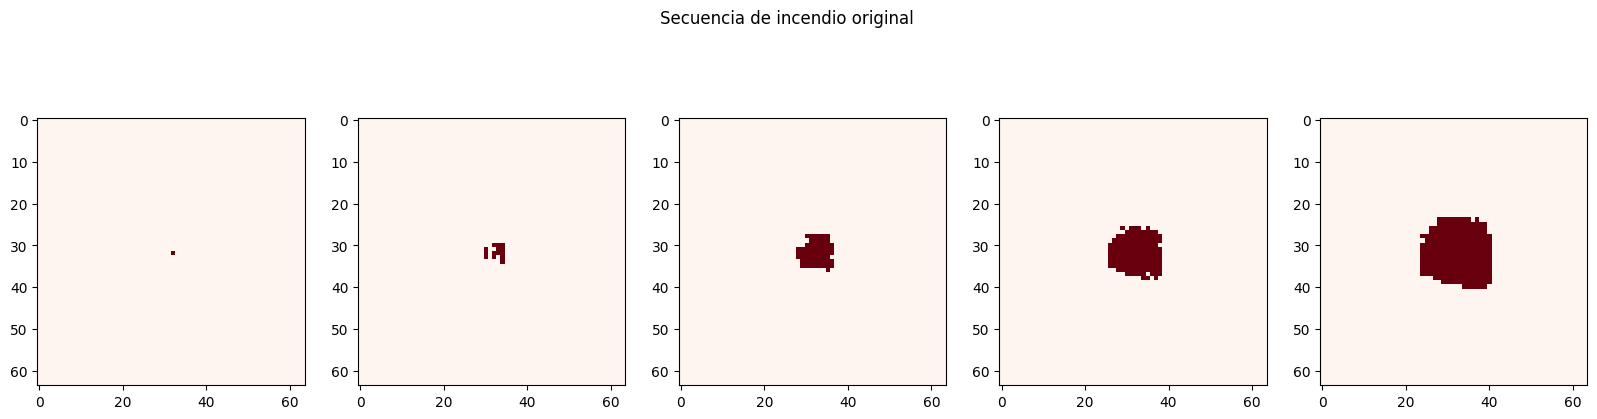

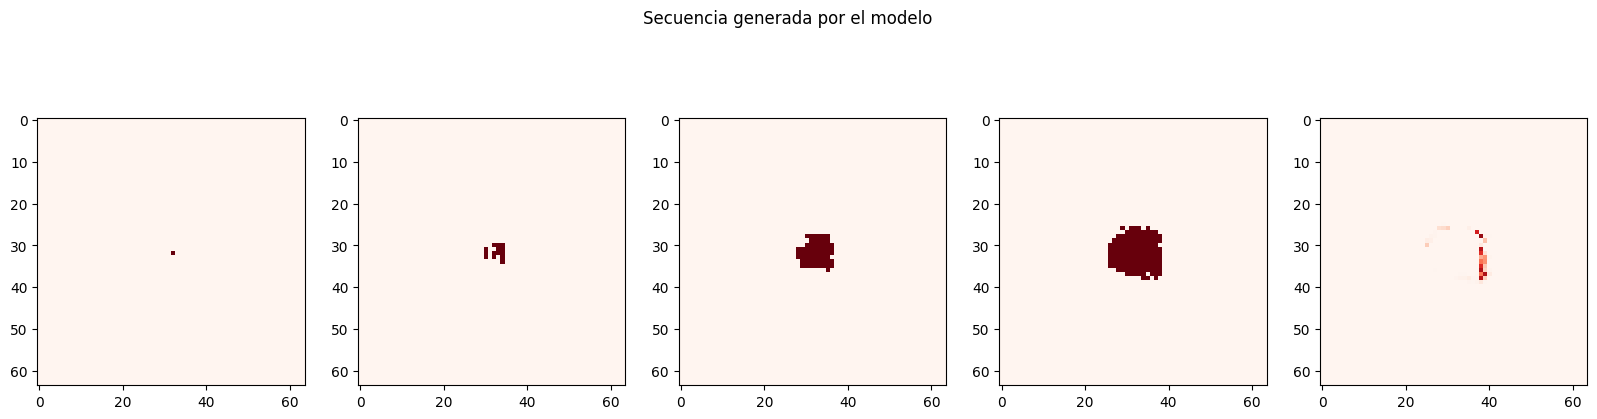

In [73]:


# Usamos la secuencia de incendios generada previamente para la predicción
frames = fire_sequence_large[:4, ...]
original_frames = fire_sequence_large[4:, ...]

# Extract the model's prediction and post-process it
new_prediction = model.predict(np.expand_dims(frames, axis=0))
new_prediction = np.squeeze(new_prediction, axis=0)

# Asegúrate de que predicted_frame tenga la misma forma que los frames en 'frames'
predicted_frame = np.squeeze(new_prediction[-1, ...], axis=-1)

# Ahora debería ser posible concatenar sin problemas
frames = np.concatenate((frames, np.expand_dims(predicted_frame, axis=0)), axis=0)

# Plot the original frames
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Secuencia de incendio original')
axes[0].imshow(fire_sequence_large[0], cmap='Reds', vmin=0, vmax=1)
axes[1].imshow(fire_sequence_large[1], cmap='Reds', vmin=0, vmax=1)
axes[2].imshow(fire_sequence_large[2], cmap='Reds', vmin=0, vmax=1)
axes[3].imshow(fire_sequence_large[3], cmap='Reds', vmin=0, vmax=1)
axes[4].imshow(fire_sequence_large[4], cmap='Reds', vmin=0, vmax=1)
plt.show()

# Plot the generated frames
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Secuencia generada por el modelo')
axes[0].imshow(frames[0], cmap='Reds', vmin=0, vmax=1)
axes[1].imshow(frames[1], cmap='Reds', vmin=0, vmax=1)
axes[2].imshow(frames[2], cmap='Reds', vmin=0, vmax=1)
axes[3].imshow(frames[3], cmap='Reds', vmin=0, vmax=1)
axes[4].imshow(predicted_frame, cmap='Reds', vmin=0, vmax=1)

# Display the figure
plt.show()



*   En el primer renglon esta la secuencia de 5 imagenes original.
*   En la segunda estan 4 frames originales y la 5 representa la prediccion que el modelo predijo
*   La unica modificacion que le hago a la prediccion es aplicarle un limite para definir que sea 0 o 1 el valor en cada zona para poder visualizarlo de mejor manera





